# Data Scientist's Blog Post - Exploratory Data Analysis

In this notebook we perform the following activities, as relevant to the chosen dataset:
- Check that each column is a variable, and each row is an individual.
- Look at the number of rows and columns in the dataset.
- Check if there are missing values in any of the rows or columns.
- Check if any columns are of different data types than you would expect (e.g., numbers showing as strings)
- Build exploratory plots like bar charts, histograms, and scatterplots to better understand the data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

# Data Science Process Step - Gather

In [2]:
# Read data from Survey Results data file
df = pd.read_csv('./survey_results_public.csv')

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning a bachelor's degree,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup mode",9 to 10 years,...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","10,000 or more employees",Publicly-traded corporation,20 or more years,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes writes code,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day each week","10,000 or more employees",Non-profit/non-governmental organization or private school/university,14 to 15 years,...,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup mode",20 or more years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read data from Survey Results schema file
schema = pd.read_csv('./survey_results_schema.csv')

schema.head(10)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,EmploymentStatus,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
7,MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


# Data Science Process Step - Assess
## Determine Number of rows and columns in the dataset
In this notebook we will be analyzing them by ploting histograms for numerial columns and bar plots for textual values. As we know, some of the textual values have long text or concatenation of multiple categorical values.

This analysis would be helpful utilizing this data to derive business insights.

In [4]:
# Number of rows and columns in the input dataset
print(f'The input data file has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'The input schema file has {schema.shape[0]} rows and {schema.shape[1]} columns')

The input data file has 19102 rows and 154 columns
The input schema file has 154 rows and 2 columns


## Determine columns having no missing values
As we see below the following columns have no missing values:
- Respondent (Unique ID)
- Country
- EmploymentStatus
- FormalEducation
- Professional
- ProgramHobby
- University


In [5]:
# Determine the list of no missing value columns
no_null_cols = set(df.columns[df.isnull().mean()==0])

no_null_cols

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [6]:
# This is another way of checking which columns have missing values. We find below that
# all columns are not null, and therefore does not contain any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 22.4+ MB


# Data Science Process Step - Analyze
## Exploratory Analysis of numerical columns
### Closer Look at numerical columns
The following are the numerical columns:
- Respondent
- CareerSatisfaction
- JobSatisfaction
- HoursPerWeek
- StackOverflowSatisfaction
- Salary
- ExpectedSalary

In [7]:
# List of all numeric columns of the data frame
num_df = df.select_dtypes(include=['int64', 'float64']).copy()
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Respondent                 19102 non-null  int64  
 1   CareerSatisfaction         16102 non-null  float64
 2   JobSatisfaction            15253 non-null  float64
 3   HoursPerWeek               7721 non-null   float64
 4   StackOverflowSatisfaction  13452 non-null  float64
 5   Salary                     5009 non-null   float64
 6   ExpectedSalary             818 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 1.0 MB


In [8]:
# Sample values of numerical columns
num_df.head()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,1,NaN,NaN,0.0,9.0,NaN,NaN
1,2,NaN,NaN,NaN,8.0,NaN,37500.0
2,3,8.0,9.0,NaN,8.0,113750.0,NaN
3,4,6.0,3.0,5.0,10.0,NaN,NaN
4,5,6.0,8.0,NaN,NaN,NaN,NaN


In [9]:
# Statistics of these numerical columns
num_df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


## Helper Functions

In [10]:
def get_description(col):
    """
    Function returns description of col from schema.
    INPUT
    - col - Name of the dataframe column
    OUTPUT
    - description of the Column
    """
    return list(schema[schema['Column']==col]['Question'])[0]

In [11]:
def draw_hist(col):
    """
    Function draws histogram for the dataframe column col.
    INPUT
    - col - Name of the dataframe column
    OUTPUT
    - None
    """
    df.hist(column=col)
    print(get_description(col))
    print('\nNull values:', df[col].isnull().sum(), 'of', df[col].shape[0])    

In [12]:
def draw_bar(df, col_name, len=0):
    """
    Function to draw bar plot for categorical data in a column.
    INPUT
    - df - Pandas dataframe containg data column to be visualized
    - col_name - name of the column to be visualized
    - len - number of top values to be included in the visualization; default is 0
    - max - maximum number of unique values abailable in the column
    OUTPUT
    - None
    PERFORMS
    - Diaplys the data on a bar plot, limits display to request number of values(len)
    
    """
    print(get_description(col_name))
    print('\nNull values:', df[col_name].isnull().sum(), 'of', df[col_name].shape[0])
    vals = df[col_name].value_counts()    

    plt.title(col_name);
    if len == 0:
        vals.plot(kind='bar'); 
    else:
        plt.title(col_name + ' (partial list)');
        vals[:len].plot(kind='bar');    
        

## Histogram of numerical columns

### Column 'respondent' contains Unique Column Values
This column contains unique values, which is an assertion that there are no duplicate entries in this dataset.

Respondent ID number

Null values: 0 of 19102


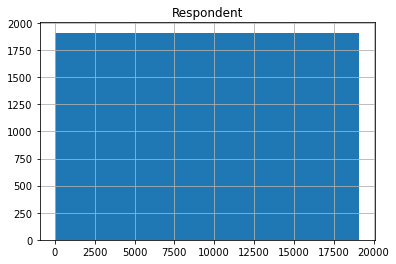

In [13]:
# Histogrm for column 'respondent'. This column represents auto-incremented id value.
# Thus this column does not represent much variability in data values
draw_hist('Respondent');

Career satisfaction rating

Null values: 3000 of 19102


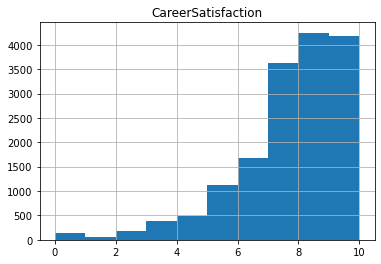

In [14]:
# Histogrm for column 'CareerSatisfaction'
draw_hist('CareerSatisfaction');

Job satisfaction rating

Null values: 3849 of 19102


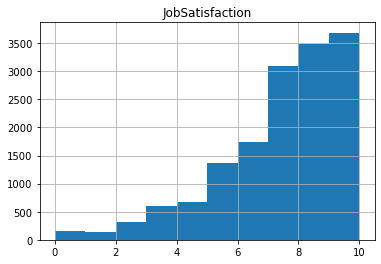

In [15]:
# Histogrm for column 'JobSatisfaction'
draw_hist('JobSatisfaction');

During a typical week, approximately how many hours do you spend on activities related to finding new job opportunities?Please adjust the slider to the appropriate number of hours. The box to the right will indicate the number of hours you have chosen.

Null values: 11381 of 19102


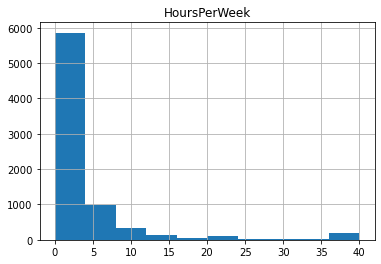

In [16]:
# Histogrm for column 'HoursPerWeek'
draw_hist('HoursPerWeek');

Stack Overflow satisfaction

Null values: 5650 of 19102


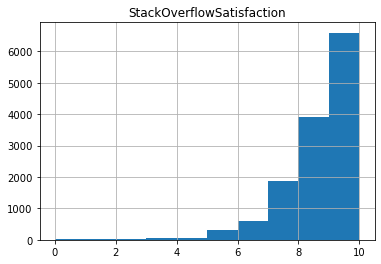

In [17]:
# Histogram for column 'StackOverflowSatisfaction'
draw_hist('StackOverflowSatisfaction');

What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?

Null values: 14093 of 19102


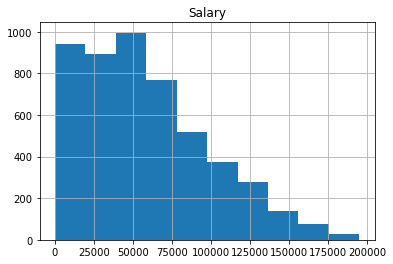

In [18]:
# Histogram for column 'Salary'
draw_hist('Salary');

You said before that you are currently learning how to program. When you have completed your studies, what annual salary do you expect to earn in your first job after graduation?

Null values: 18284 of 19102


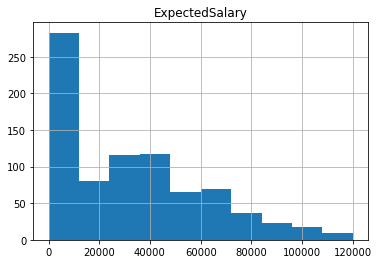

In [19]:
# Histogram for column 'ExpectedSalary'
draw_hist('ExpectedSalary');

## Correlation between numericat variables

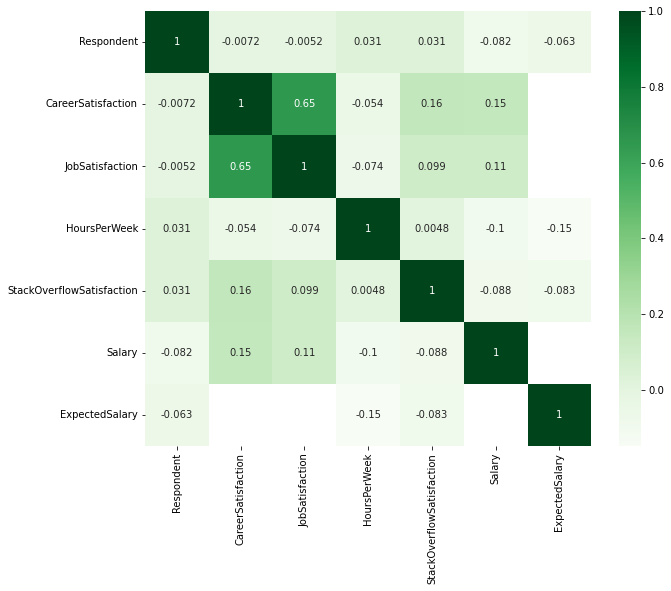

In [20]:
# Heatmap among numerical variables
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt='.2g', cmap='Greens', annot=True); 

## Exploratory Data Analysis of character data columns
We will explore non-numeric columns for understanding nature of data stored. During this process we will identify the categorical columns.

In [21]:
# List character based (or non-numeric) columns from the data frame
# We find that there are 147 such columns in the data frame
df.select_dtypes(exclude=['int64', 'float64']).dtypes

Professional                        object
ProgramHobby                        object
Country                             object
University                          object
EmploymentStatus                    object
FormalEducation                     object
MajorUndergrad                      object
HomeRemote                          object
CompanySize                         object
CompanyType                         object
YearsProgram                        object
YearsCodedJob                       object
YearsCodedJobPast                   object
DeveloperType                       object
WebDeveloperType                    object
MobileDeveloperType                 object
NonDeveloperType                    object
ExCoderReturn                       object
ExCoderNotForMe                     object
ExCoderBalance                      object
ExCoder10Years                      object
ExCoderBelonged                     object
ExCoderSkills                       object
ExCoderWill

In [22]:
# Get number of unique values held my a column
df.nunique()

Respondent                          19102
Professional                            5
ProgramHobby                            4
Country                               165
University                              4
EmploymentStatus                        7
FormalEducation                         9
MajorUndergrad                         16
HomeRemote                              7
CompanySize                            10
CompanyType                            11
YearsProgram                           21
YearsCodedJob                          21
YearsCodedJobPast                      21
DeveloperType                        1024
WebDeveloperType                        3
MobileDeveloperType                     8
NonDeveloperType                       86
CareerSatisfaction                     11
JobSatisfaction                        11
ExCoderReturn                           5
ExCoderNotForMe                         5
ExCoderBalance                          5
ExCoder10Years                    

## Bar Plots for textual columns
What fllows are bar plots of all character based columns. Generally speaking, when number of possible values is 10 - 15, these visualizations show all values are bar. Otherwise, top 10 to 15 values are shown.

Which of the following best describes you?

Null values: 0 of 19102


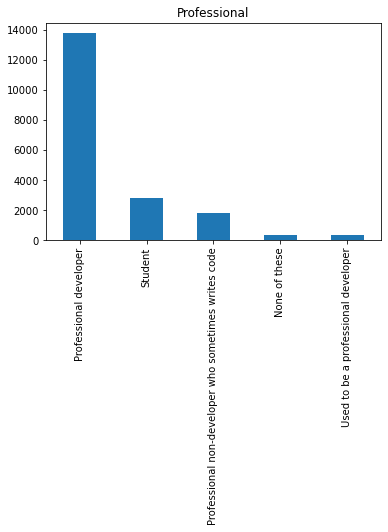

In [23]:
draw_bar(df, 'Professional')

Do you program as a hobby or contribute to open source projects?

Null values: 0 of 19102


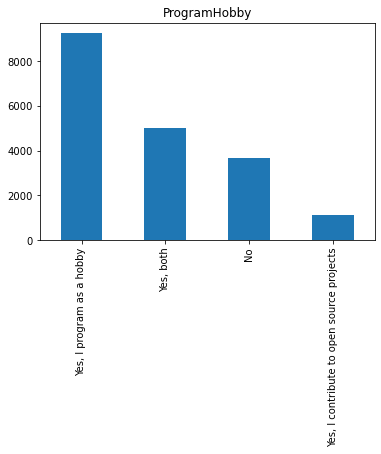

In [24]:
draw_bar(df, 'ProgramHobby')

In which country do you currently live?

Null values: 0 of 19102


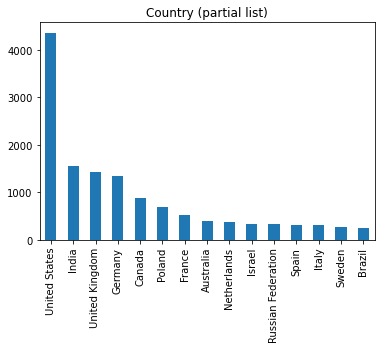

In [25]:
draw_bar(df, 'Country', 15)

Are you currently enrolled in a formal, degree-granting college or university program?

Null values: 0 of 19102


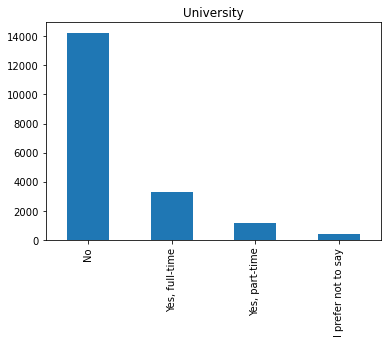

In [26]:
draw_bar(df, 'University')

Which of the following best describes your current employment status?

Null values: 0 of 19102


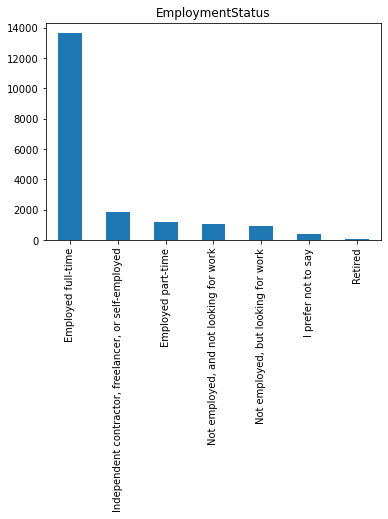

In [27]:
draw_bar(df, 'EmploymentStatus')

Which of the following best describes the highest level of formal education that you've completed?

Null values: 0 of 19102


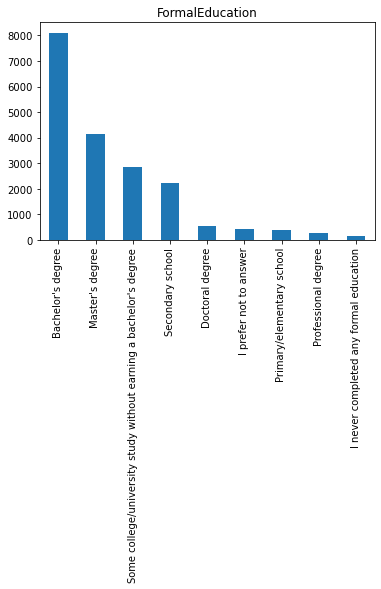

In [28]:
draw_bar(df, 'FormalEducation')

Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?

Null values: 3203 of 19102


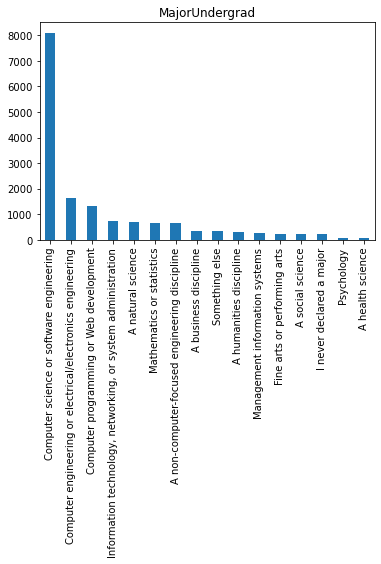

In [29]:
draw_bar(df, 'MajorUndergrad')

How often do you work from home or remotely?

Null values: 2631 of 19102


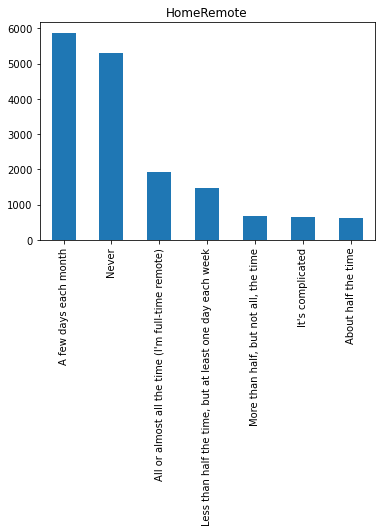

In [30]:
draw_bar(df, 'HomeRemote')

In terms of the number of employees, how large is the company or organization you work for?

Null values: 4449 of 19102


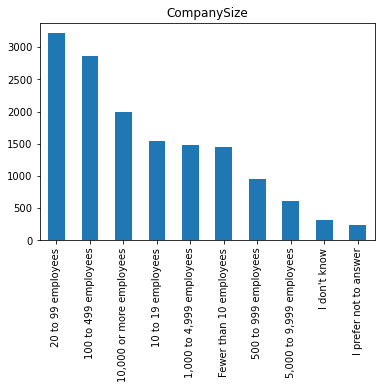

In [31]:
draw_bar(df, 'CompanySize')

Which of the following best describes the type of company or organization you work for?

Null values: 4493 of 19102


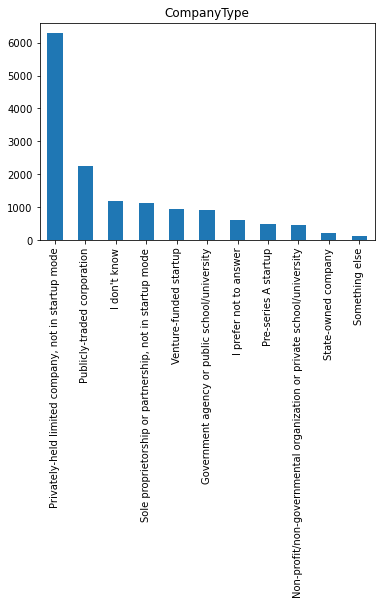

In [32]:
draw_bar(df, 'CompanyType')

How long has it been since you first learned how to program?

Null values: 97 of 19102


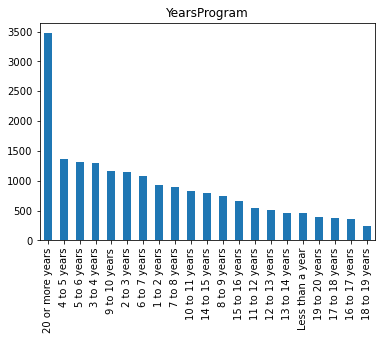

In [33]:
draw_bar(df, 'YearsProgram')

For how many years have you coded as part of your job?

Null values: 3711 of 19102


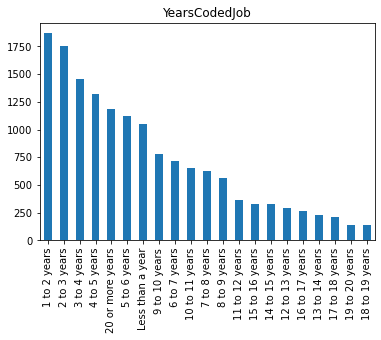

In [34]:
draw_bar(df, 'YearsCodedJob')

For how many years did you code as part of your job?

Null values: 18753 of 19102


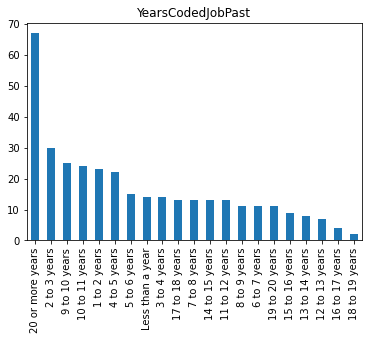

In [35]:
draw_bar(df, 'YearsCodedJobPast')

Which of the following best describe you?

Null values: 5330 of 19102


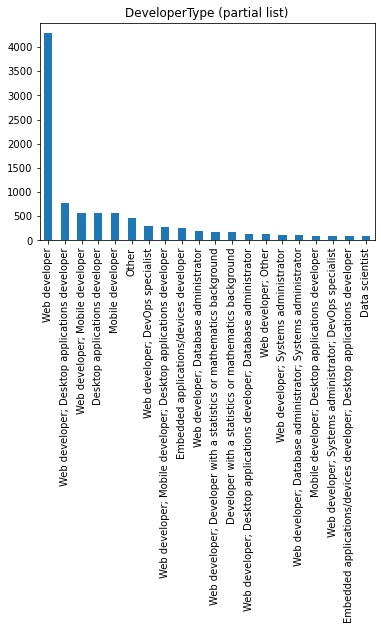

In [36]:
draw_bar(df, 'DeveloperType', 20)

Which of the following best describes you as a Web developer?

Null values: 14816 of 19102


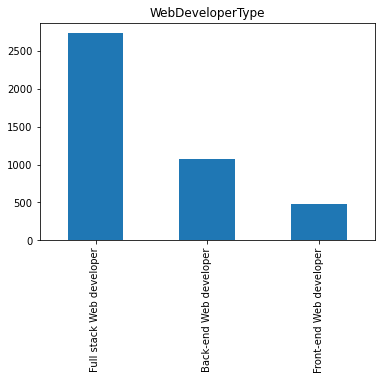

In [37]:
draw_bar(df, 'WebDeveloperType')

For which of the following platforms do you develop mobile applications?

Null values: 18546 of 19102


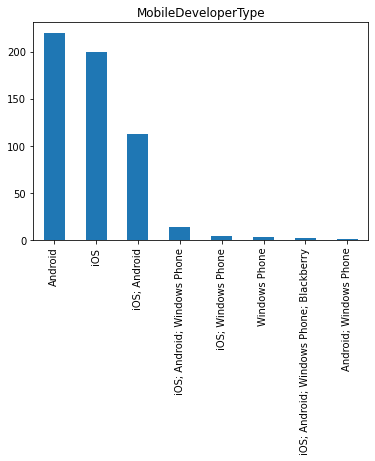

In [38]:
draw_bar(df, 'MobileDeveloperType')

Which of the following describe you?

Null values: 17414 of 19102


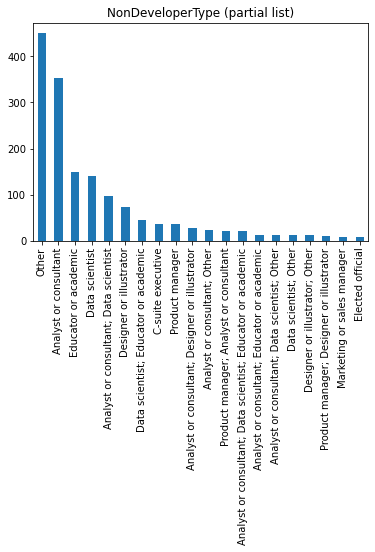

In [39]:
draw_bar(df, 'NonDeveloperType', 20)

You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? If money weren't an issue, I would take a coding job again

Null values: 18767 of 19102


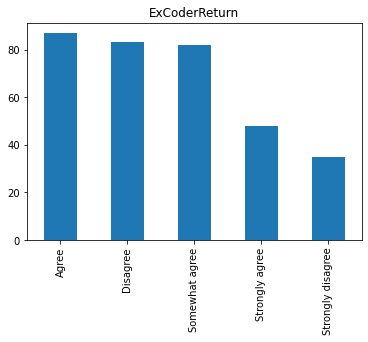

In [40]:
draw_bar(df, 'ExCoderReturn')

You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? Working as a developer just wasn't for me

Null values: 18770 of 19102


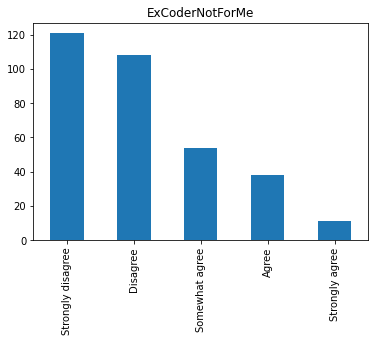

In [41]:
draw_bar(df, 'ExCoderNotForMe')

You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? I have better work-life balance now than I did as a developer

Null values: 18767 of 19102


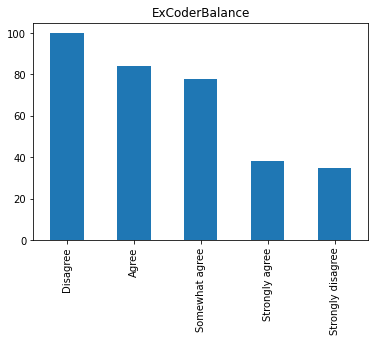

In [42]:
draw_bar(df, 'ExCoderBalance')

You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? My career is going the way I thought it would 10 years ago

Null values: 18766 of 19102


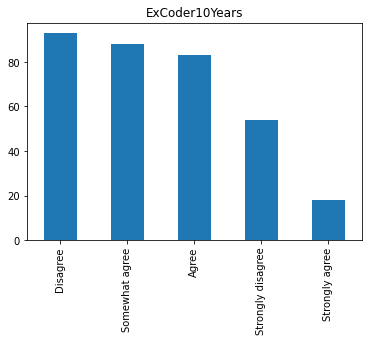

In [43]:
draw_bar(df, 'ExCoder10Years')

You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? When I was a developer, I didn't feel like I belonged with my colleagues

Null values: 18767 of 19102


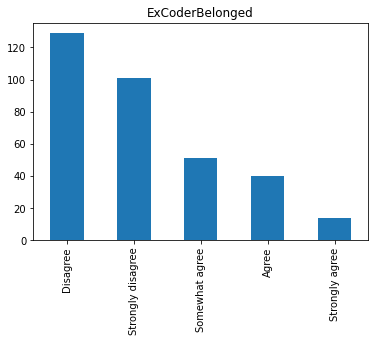

In [44]:
draw_bar(df, 'ExCoderBelonged')

You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? I don't think my coding skills are up to date

Null values: 18766 of 19102


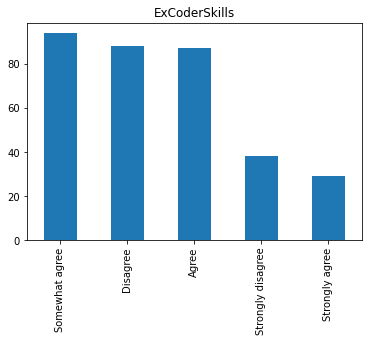

In [45]:
draw_bar(df, 'ExCoderSkills')

You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? I probably won't code for a living ever again

Null values: 18770 of 19102


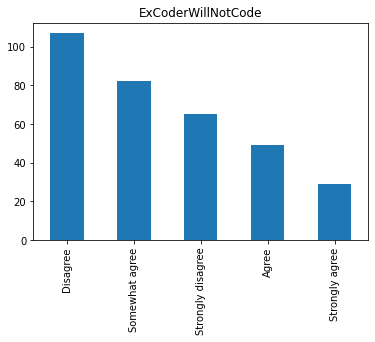

In [46]:
draw_bar(df, 'ExCoderWillNotCode')

You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? I'm still active in the developer community

Null values: 18767 of 19102


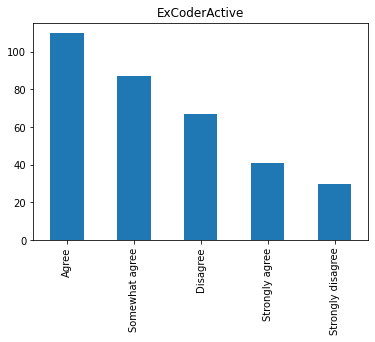

In [47]:
draw_bar(df, 'ExCoderActive')

How do you pronounce "GIF"?

Null values: 162 of 19102


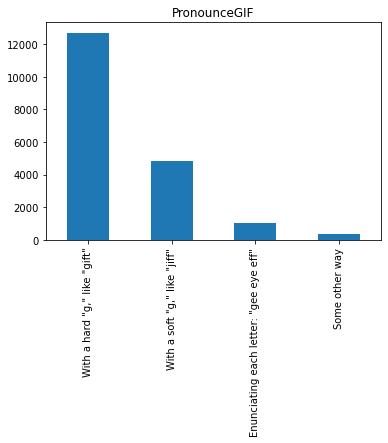

In [48]:
draw_bar(df, 'PronounceGIF')

I love solving problems

Null values: 6882 of 19102


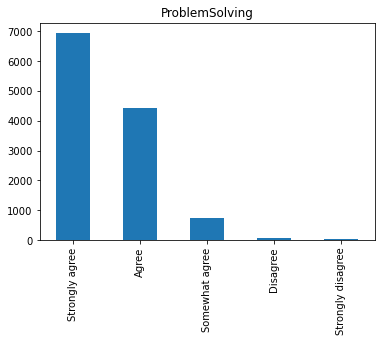

In [49]:
draw_bar(df, 'ProblemSolving')

Building things is very rewarding

Null values: 6901 of 19102


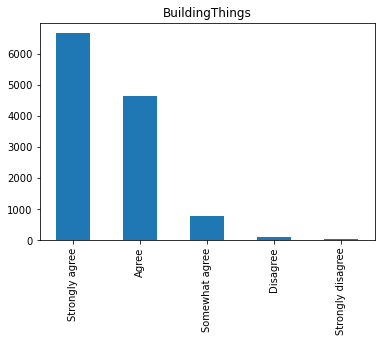

In [50]:
draw_bar(df, 'BuildingThings')

Learning new technologies is fun

Null values: 6886 of 19102


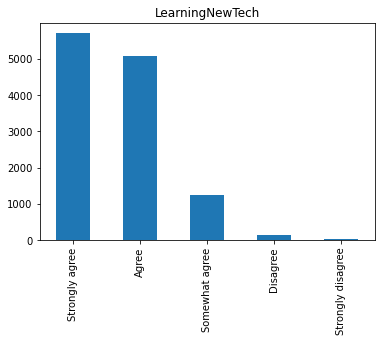

In [51]:
draw_bar(df, 'LearningNewTech')

I tend to get bored by implementation details

Null values: 6912 of 19102


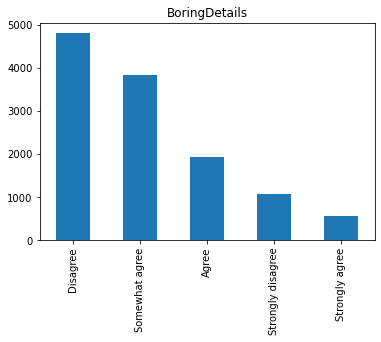

In [52]:
draw_bar(df, 'BoringDetails')

Job security is important to me

Null values: 6904 of 19102


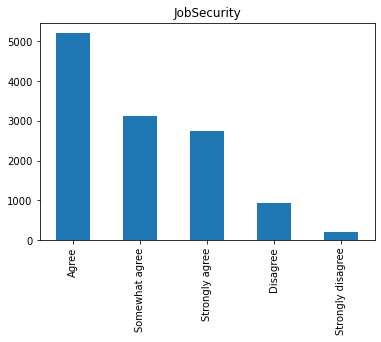

In [53]:
draw_bar(df, 'JobSecurity')

Diversity in the workplace is important

Null values: 7023 of 19102


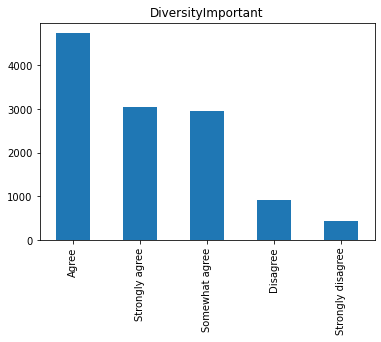

In [54]:
draw_bar(df, 'DiversityImportant')

It annoys me when software has a poor UI

Null values: 6962 of 19102


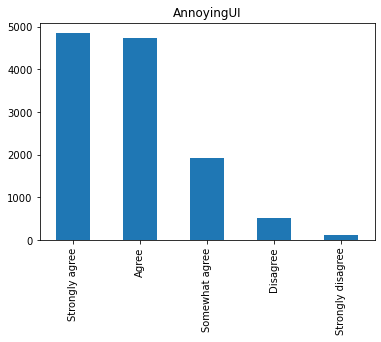

In [55]:
draw_bar(df, 'AnnoyingUI')

Most of my friends are developers, engineers, or scientists

Null values: 6959 of 19102


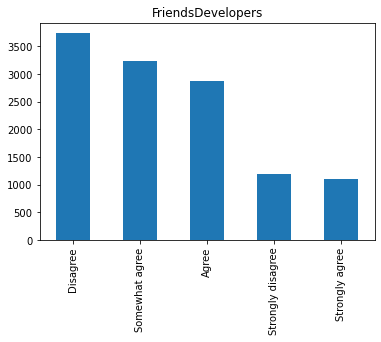

In [56]:
draw_bar(df, 'FriendsDevelopers')

There's a right and a wrong way to do everything

Null values: 6990 of 19102


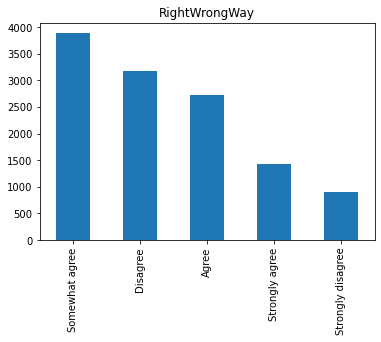

In [57]:
draw_bar(df, 'RightWrongWay')

Honestly, there's a lot about computers that I just don't understand

Null values: 6967 of 19102


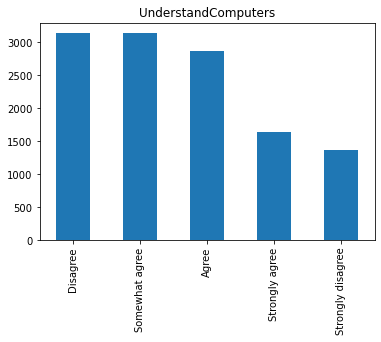

In [58]:
draw_bar(df, 'UnderstandComputers')

I take my work very seriously

Null values: 6970 of 19102


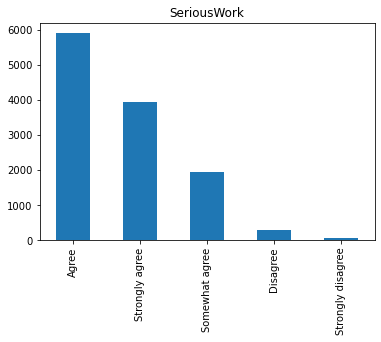

In [59]:
draw_bar(df, 'SeriousWork')

I invest a lot of time into the tools I use

Null values: 7043 of 19102


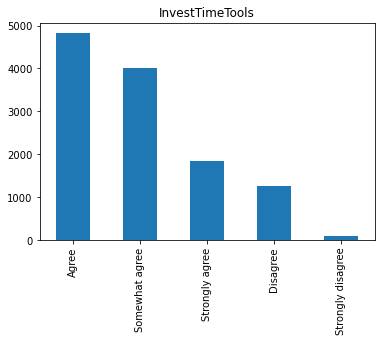

In [60]:
draw_bar(df, 'InvestTimeTools')

I don't really care what I work on, so long as I'm paid well

Null values: 7015 of 19102


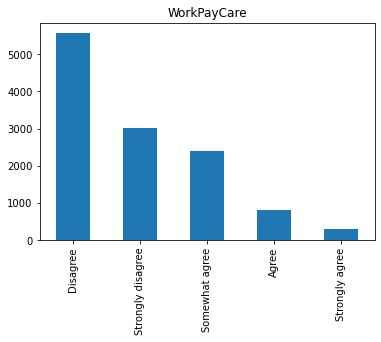

In [61]:
draw_bar(df, 'WorkPayCare')

I feel a sense of kinship to other developers

Null values: 7122 of 19102


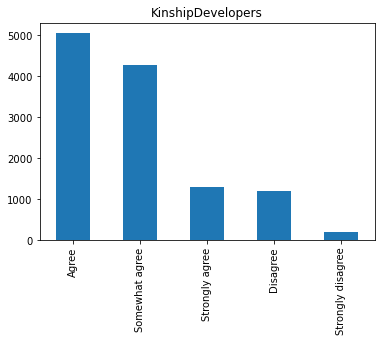

In [62]:
draw_bar(df, 'KinshipDevelopers')

I like to challenge myself

Null values: 7013 of 19102


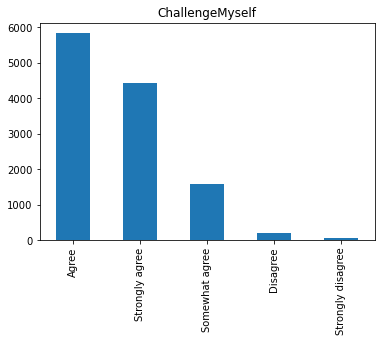

In [63]:
draw_bar(df, 'ChallengeMyself')

I think of myself as competing with my peers

Null values: 7068 of 19102


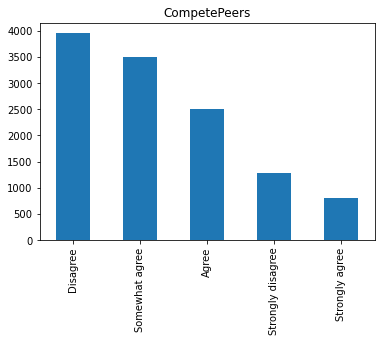

In [64]:
draw_bar(df, 'CompetePeers')

I want to change the world

Null values: 7025 of 19102


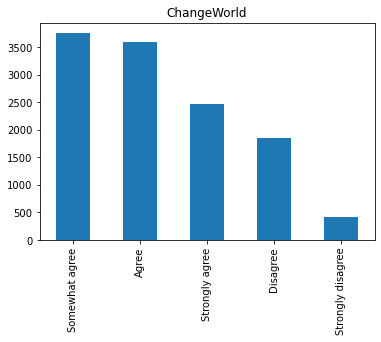

In [65]:
draw_bar(df, 'ChangeWorld')

Which of the following best describes your current job-seeking status?

Null values: 6250 of 19102


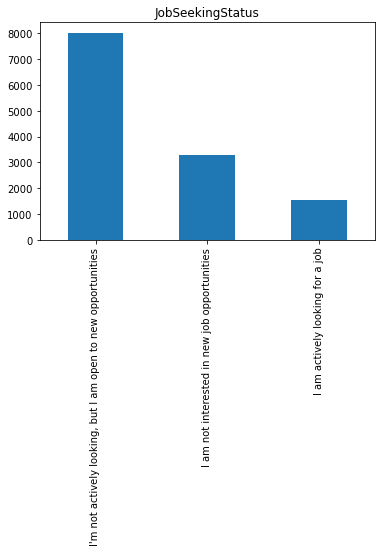

In [66]:
draw_bar(df, 'JobSeekingStatus')

When was the last time that you took a job with a new employer?

Null values: 6524 of 19102


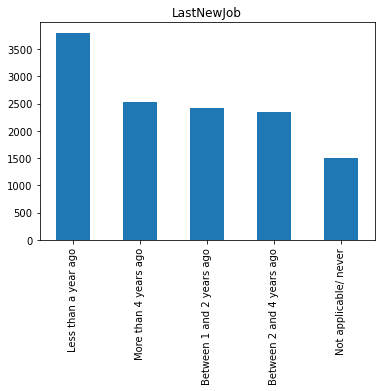

In [67]:
draw_bar(df, 'LastNewJob')

When you're assessing potential jobs to apply to, how important are each of the following to you? The industry that I'd be working in

Null values: 10701 of 19102


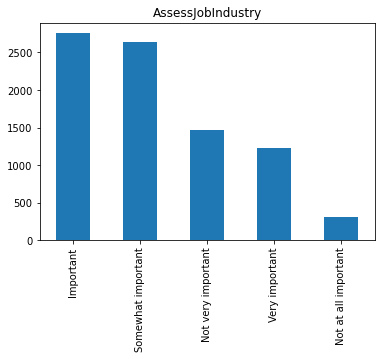

In [68]:
draw_bar(df, 'AssessJobIndustry')

When you're assessing potential jobs to apply to, how important are each of the following to you? The specific role or job title I'd be applying for

Null values: 10699 of 19102


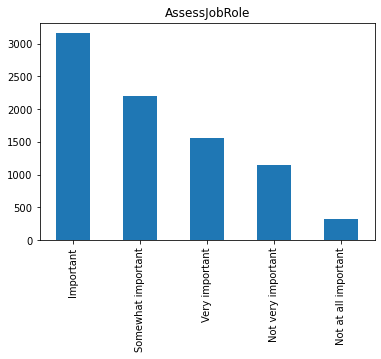

In [69]:
draw_bar(df, 'AssessJobRole')

When you're assessing potential jobs to apply to, how important are each of the following to you? The experience level called for in the job description

Null values: 10704 of 19102


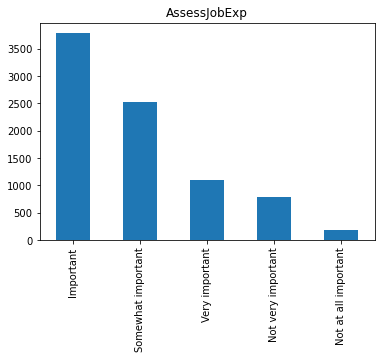

In [70]:
draw_bar(df, 'AssessJobExp')

When you're assessing potential jobs to apply to, how important are each of the following to you? The specific department or team I'd be working on

Null values: 10712 of 19102


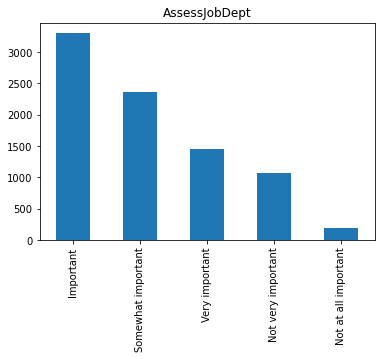

In [71]:
draw_bar(df, 'AssessJobDept')

When you're assessing potential jobs to apply to, how important are each of the following to you? The languages, frameworks, and other technologies I'd be working with

Null values: 10682 of 19102


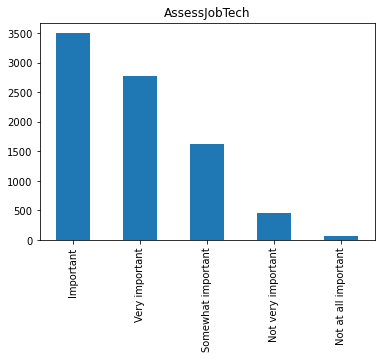

In [72]:
draw_bar(df, 'AssessJobTech')

When you're assessing potential jobs to apply to, how important are each of the following to you? How projects are managed at the company or organization

Null values: 10690 of 19102


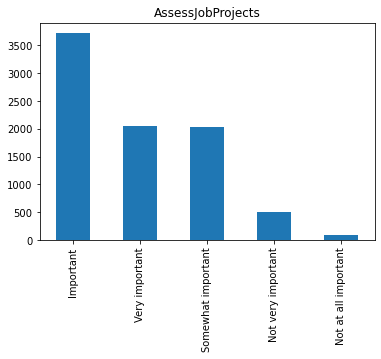

In [73]:
draw_bar(df, 'AssessJobProjects')

When you're assessing potential jobs to apply to, how important are each of the following to you? The compensation and benefits offered

Null values: 10695 of 19102


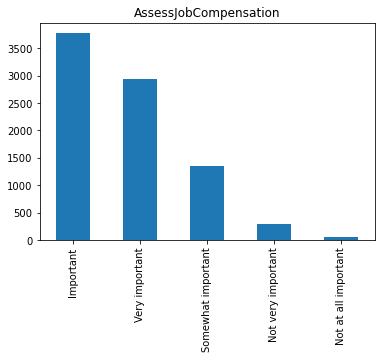

In [74]:
draw_bar(df, 'AssessJobCompensation')

When you're assessing potential jobs to apply to, how important are each of the following to you? The office environment I'd be working in

Null values: 10766 of 19102


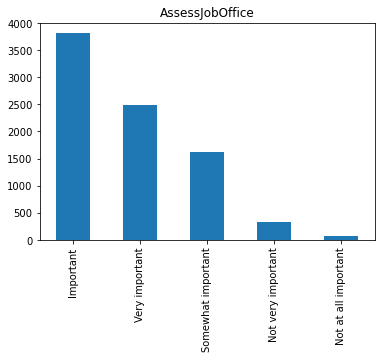

In [75]:
draw_bar(df, 'AssessJobOffice')

When you're assessing potential jobs to apply to, how important are each of the following to you? The amount of time I'd have to spend commuting

Null values: 10771 of 19102


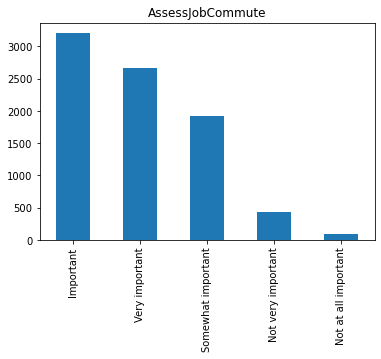

In [76]:
draw_bar(df, 'AssessJobCommute')

When you're assessing potential jobs to apply to, how important are each of the following to you? The opportunity to work from home/remotely

Null values: 10751 of 19102


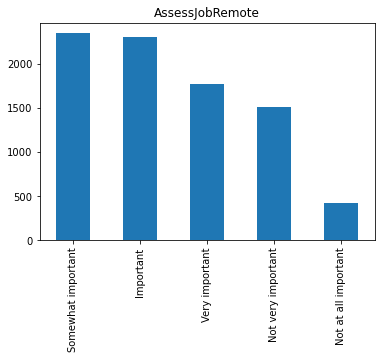

In [77]:
draw_bar(df, 'AssessJobRemote')

When you're assessing potential jobs to apply to, how important are each of the following to you? The reputations of the company's senior leaders

Null values: 10772 of 19102


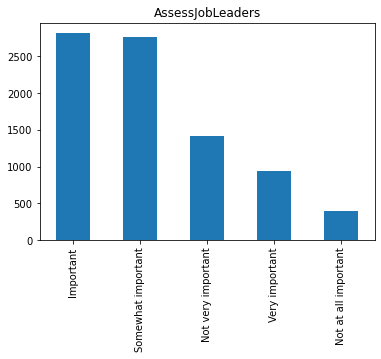

In [78]:
draw_bar(df, 'AssessJobLeaders')

When you're assessing potential jobs to apply to, how important are each of the following to you? Opportunities for professional development

Null values: 10761 of 19102


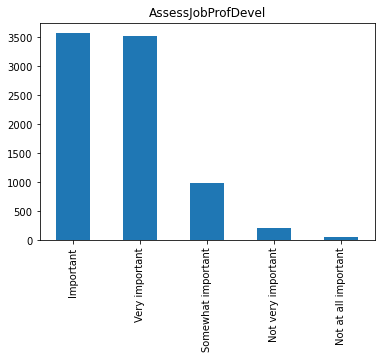

In [79]:
draw_bar(df, 'AssessJobProfDevel')

When you're assessing potential jobs to apply to, how important are each of the following to you? The diversity of the company or organization

Null values: 10778 of 19102


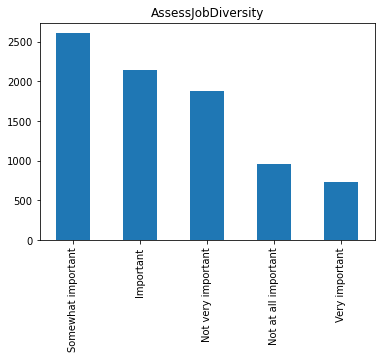

In [80]:
draw_bar(df, 'AssessJobDiversity')

When you're assessing potential jobs to apply to, how important are each of the following to you? How widely used or impactful the product or service I'd be working on is

Null values: 10768 of 19102


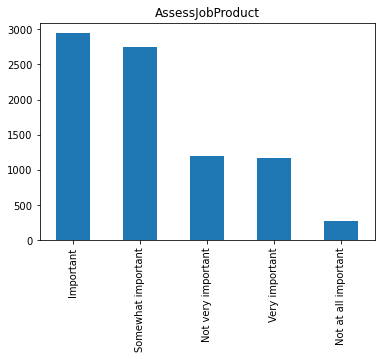

In [81]:
draw_bar(df, 'AssessJobProduct')

When you're assessing potential jobs to apply to, how important are each of the following to you? The financial performance or funding status of the company or organization

Null values: 10751 of 19102


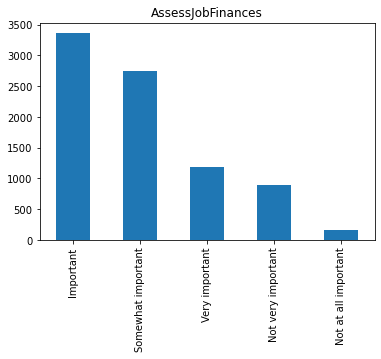

In [82]:
draw_bar(df, 'AssessJobFinances')

When it comes to compensation and benefits, other than base salary, which of the following are most important to you?

Null values: 7532 of 19102


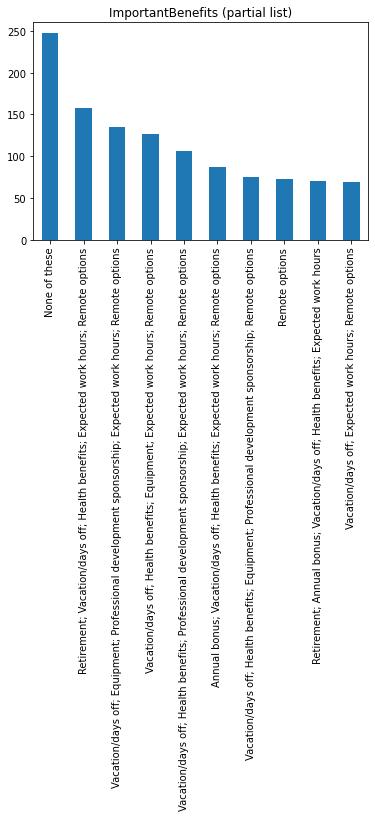

In [83]:
draw_bar(df, 'ImportantBenefits', 10)

If two developers are sharing an office, is it OK for one of them to get a mechanical keyboard with loud "clicky" keys?

Null values: 3744 of 19102


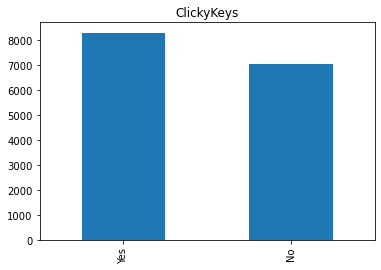

In [84]:
draw_bar(df, 'ClickyKeys')

On which of the following sites do you maintain a profile, CV, or resumé?

Null values: 9912 of 19102


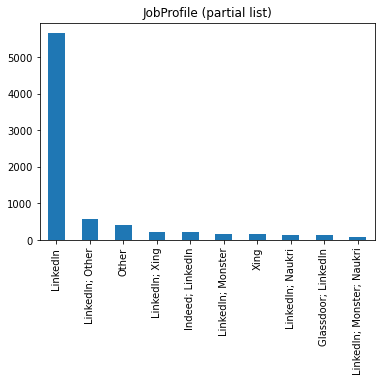

In [85]:
draw_bar(df, 'JobProfile', 10)

Think back to the last time you updated your resumé, CV, or an online profile on a job site. What prompted you to do so?

Null values: 10398 of 19102


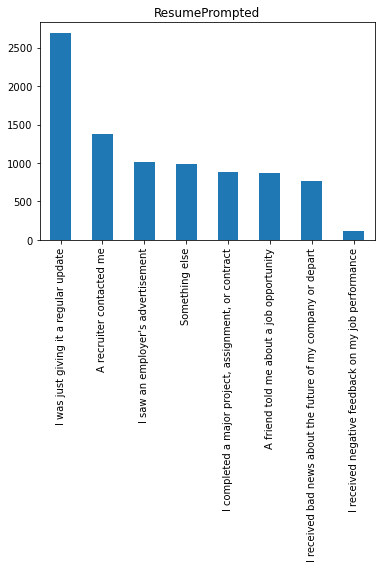

In [86]:
draw_bar(df, 'ResumePrompted')

Think back to when you first applied to work for your current employer. Which of the following best describes how you learned that they were hiring for that particular job?

Null values: 9919 of 19102


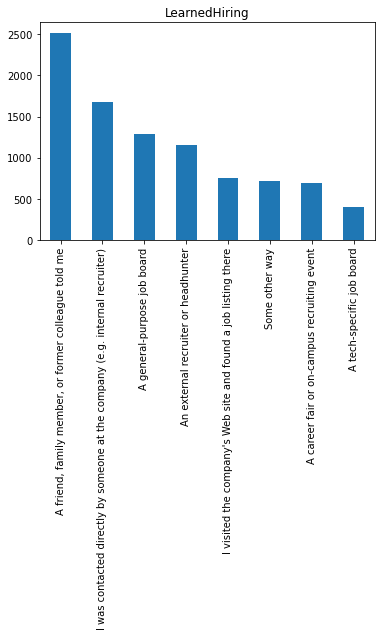

In [87]:
draw_bar(df, 'LearnedHiring')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Knowledge of algorithms and data structures

Null values: 8212 of 19102


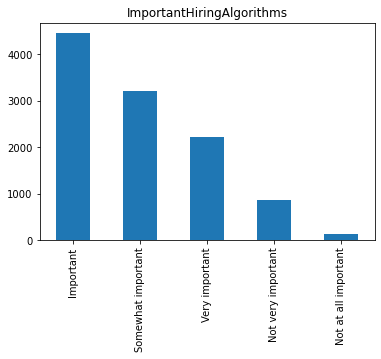

In [88]:
draw_bar(df, 'ImportantHiringAlgorithms')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Experience with specific tools (libraries, frameworks, etc.) used by the employer

Null values: 8208 of 19102


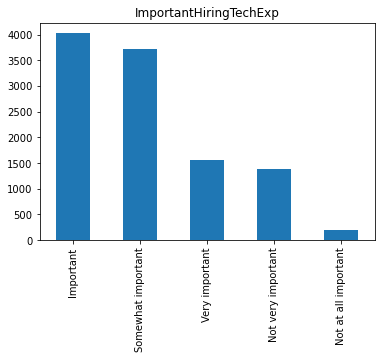

In [89]:
draw_bar(df, 'ImportantHiringTechExp')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Communication skills

Null values: 8223 of 19102


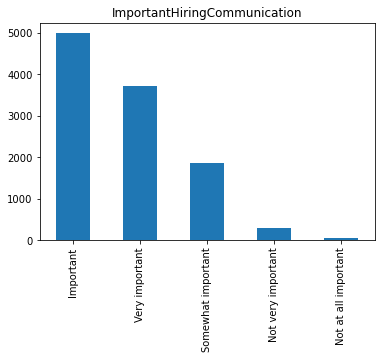

In [90]:
draw_bar(df, 'ImportantHiringCommunication')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Contributions to open source projects

Null values: 8238 of 19102


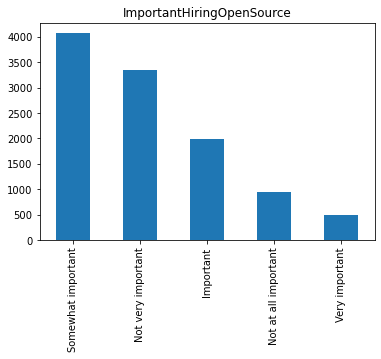

In [91]:
draw_bar(df, 'ImportantHiringOpenSource')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Experience with specific project management tools & techniques

Null values: 8233 of 19102


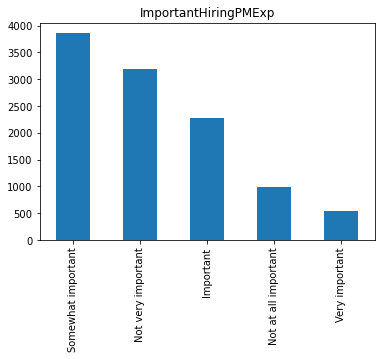

In [92]:
draw_bar(df, 'ImportantHiringPMExp')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Previous companies worked at

Null values: 8251 of 19102


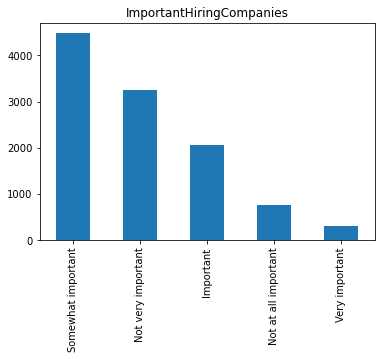

In [93]:
draw_bar(df, 'ImportantHiringCompanies')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Previous job titles held

Null values: 8243 of 19102


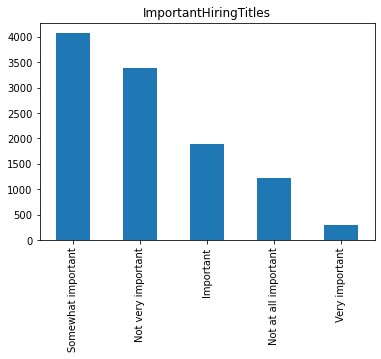

In [94]:
draw_bar(df, 'ImportantHiringTitles')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Educational credentials (e.g. schools attended, specific field of study, grades earned)

Null values: 8219 of 19102


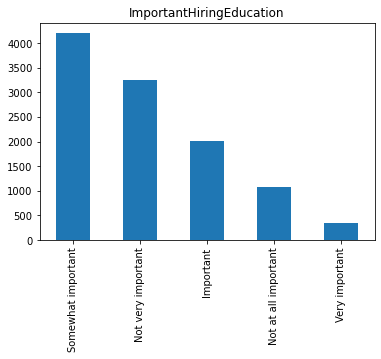

In [95]:
draw_bar(df, 'ImportantHiringEducation')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Stack Overflow reputation

Null values: 8224 of 19102


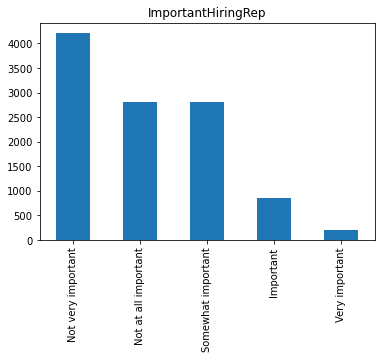

In [96]:
draw_bar(df, 'ImportantHiringRep')

Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Track record of getting things done

Null values: 8253 of 19102


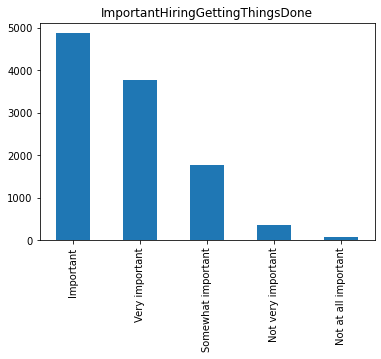

In [97]:
draw_bar(df, 'ImportantHiringGettingThingsDone')

Which currency do you use day-to-day? If you're a globe-trotting digital nomad and the answer is “it's complicated,” please pick the one you're most comfortable estimating in.

Null values: 11070 of 19102


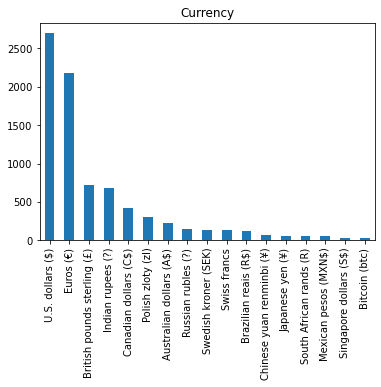

In [98]:
draw_bar(df, 'Currency')

Compared to your estimate of your own market value, do you think you are…?

Null values: 13918 of 19102


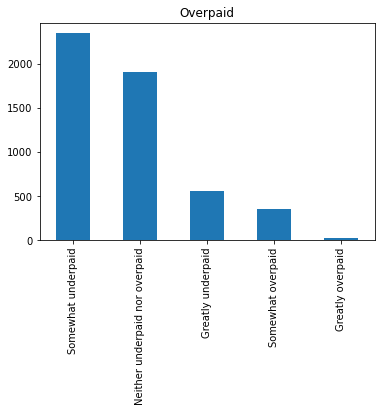

In [99]:
draw_bar(df, 'Overpaid')

Tabs or spaces?

Null values: 4797 of 19102


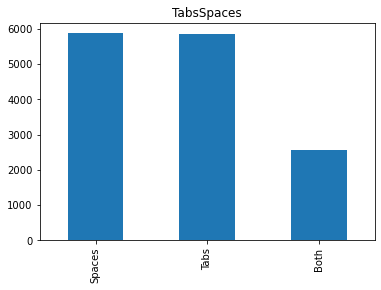

In [100]:
draw_bar(df, 'TabsSpaces')

Overall, how important has your formal schooling and education been to your career success?

Null values: 10037 of 19102


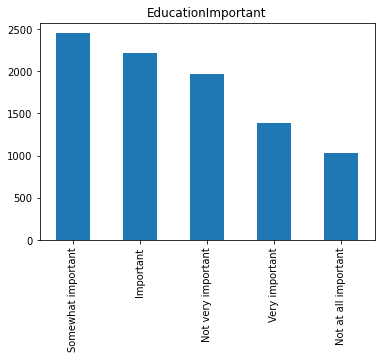

In [101]:
draw_bar(df, 'EducationImportant')

Outside of your formal schooling and education, which of the following have you done?

Null values: 7637 of 19102


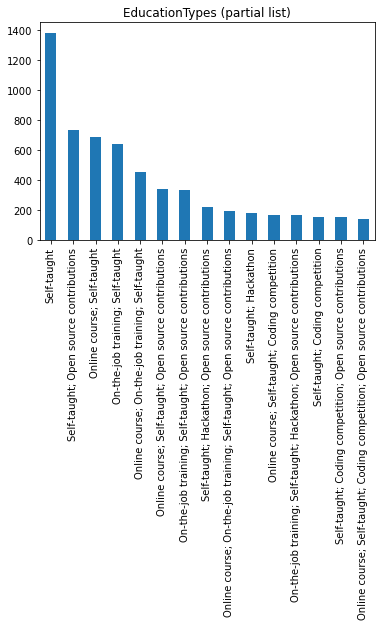

In [102]:
draw_bar(df, 'EducationTypes', 15)

You indicated that you had taught yourself a programming technology without taking a course. What resources did you use to do that? If you've done it more than once, please think about the most recent time you've done so.

Null values: 8929 of 19102


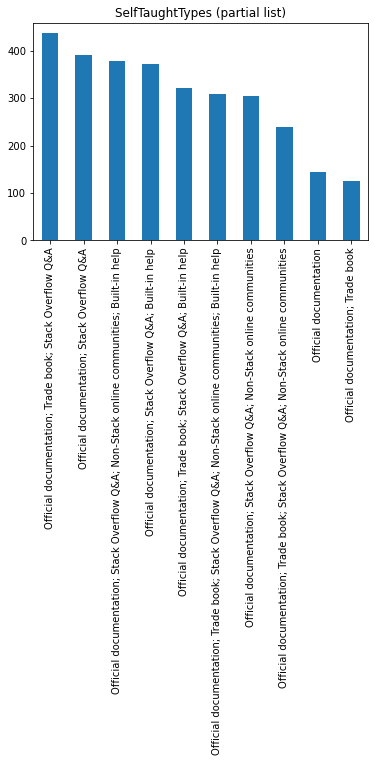

In [103]:
draw_bar(df, 'SelfTaughtTypes', 10)

You indicated previously that you went through a developer “bootcamp.” How long did it take you to get a full-time job as a developer after graduating?

Null values: 18220 of 19102


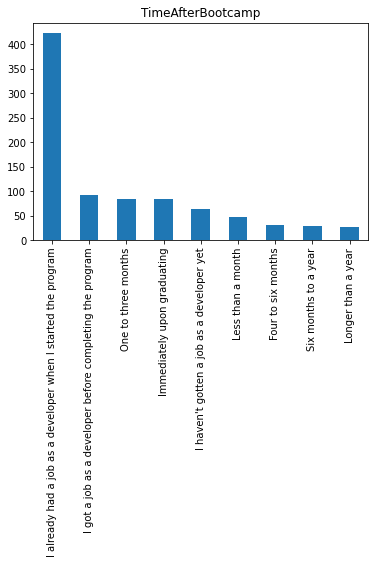

In [104]:
draw_bar(df, 'TimeAfterBootcamp')

Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?
Let's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?
Let's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which of 

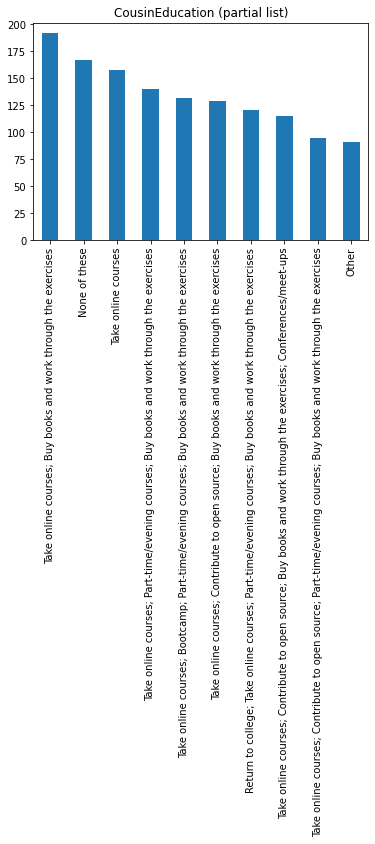

In [105]:
draw_bar(df, 'CousinEducation', 10)

Suppose you could choose your own working hours for an 8-hour day. What time would you start work for the day? Please adjust the slider to the hour nearest your ideal start time. The box next to the slider will display your selection using a 24-hour clock

Null values: 5579 of 19102


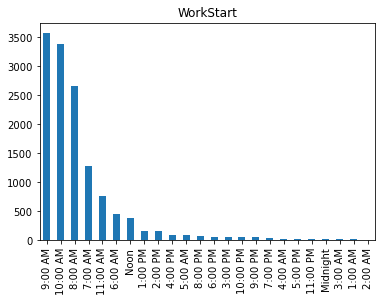

In [106]:
draw_bar(df, 'WorkStart')

Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?

Null values: 5576 of 19102


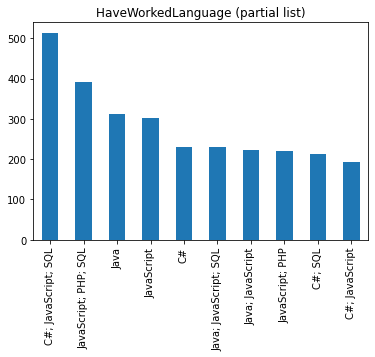

In [107]:
draw_bar(df, 'HaveWorkedLanguage', 10)

Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?

Null values: 6579 of 19102


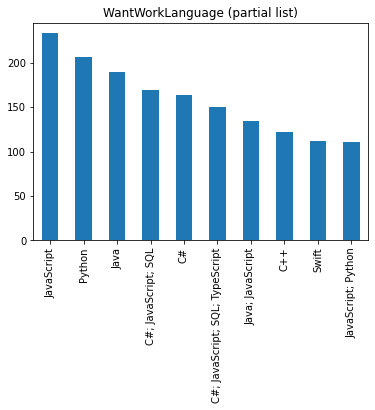

In [108]:
draw_bar(df, 'WantWorkLanguage', 10)

Which of the following libraries, frameworks, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year?

Null values: 11808 of 19102


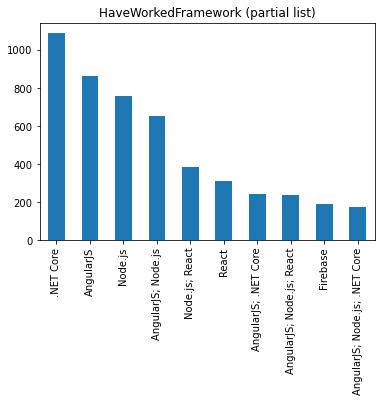

In [109]:
draw_bar(df, 'HaveWorkedFramework', 10)

Which of the following libraries, frameworks, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year?

Null values: 10603 of 19102


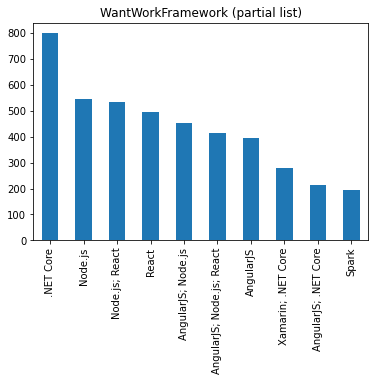

In [110]:
draw_bar(df, 'WantWorkFramework', 10)

Which of the following database technologies have you done extensive development work in over the past year, and which do you want to work in over the next year?

Null values: 8310 of 19102


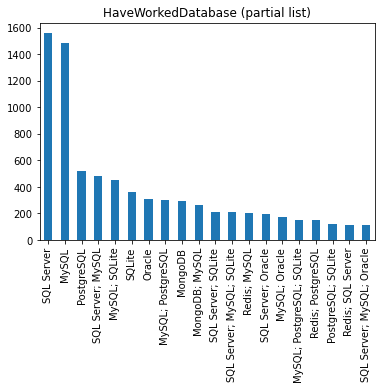

In [111]:
draw_bar(df, 'HaveWorkedDatabase', 20)

Which of the following database technologies have you done extensive development work in over the past year, and which do you want to work in over the next year?

Null values: 9943 of 19102


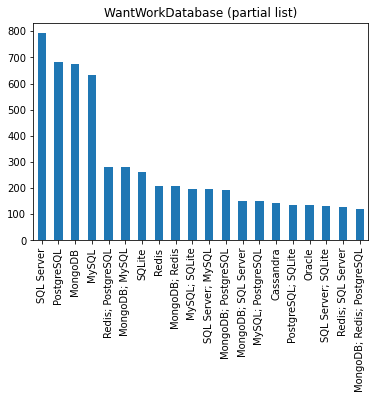

In [112]:
draw_bar(df, 'WantWorkDatabase', 20)

Which of the following platforms have you done extensive development work for over the past year, and which do you want to work on over the next year?

Null values: 8522 of 19102


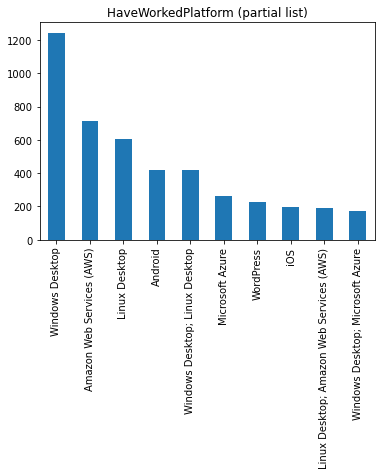

In [113]:
draw_bar(df, 'HaveWorkedPlatform', 10)

Which of the following platforms have you done extensive development work for over the past year, and which do you want to work on over the next year?

Null values: 8944 of 19102


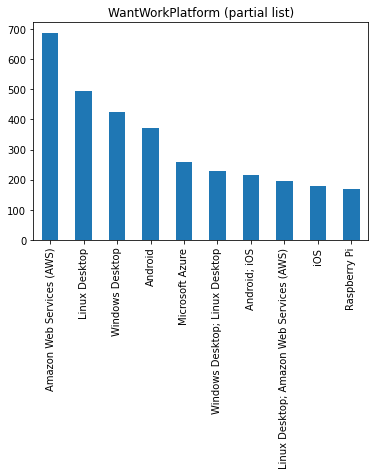

In [114]:
draw_bar(df, 'WantWorkPlatform', 10)

Which development environment(s) do you use regularly?

Null values: 5905 of 19102


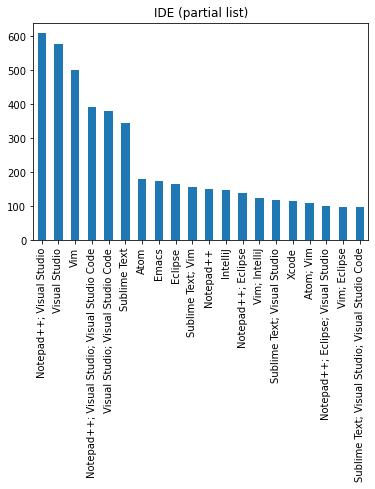

In [115]:
draw_bar(df, 'IDE', 20)

Suppose you're about to start a few hours of coding and have complete control over your auditory environment (music, background noise, etc.). What would you do?

Null values: 5651 of 19102


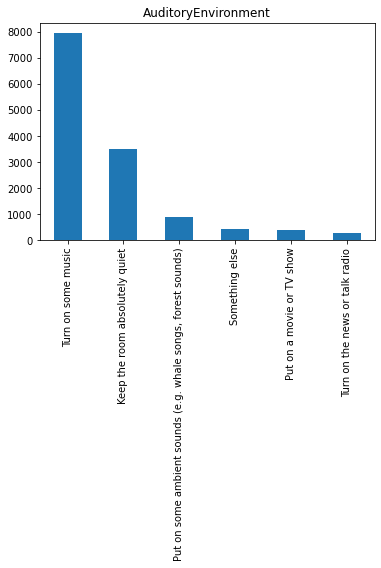

In [116]:
draw_bar(df, 'AuditoryEnvironment')

Which of the following methodologies do you have experience working in?

Null values: 9515 of 19102


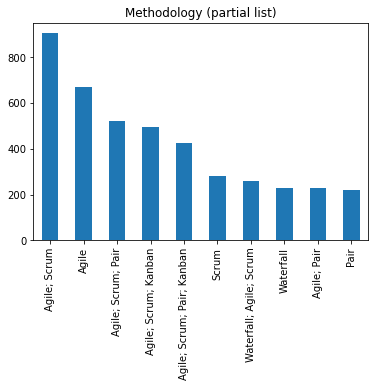

In [117]:
draw_bar(df, 'Methodology', 10)

What version control system do you use? If you use several, please choose the one you use most often.

Null values: 7531 of 19102


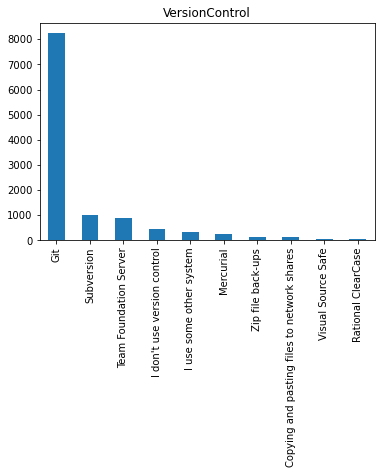

In [118]:
draw_bar(df, 'VersionControl')

Over the last year, how often have you checked-in or committed code?

Null values: 7898 of 19102


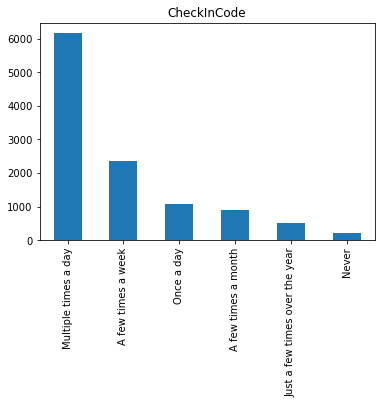

In [119]:
draw_bar(df, 'CheckInCode')

It's better to ship now and optimize later

Null values: 7893 of 19102


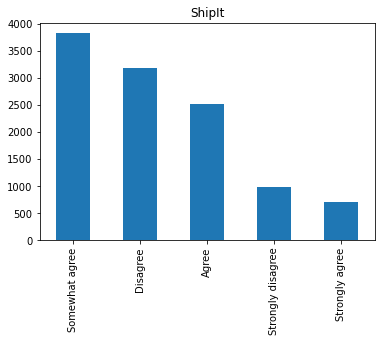

In [120]:
draw_bar(df, 'ShipIt')

Maintaining other people's code is a form of torture

Null values: 7900 of 19102


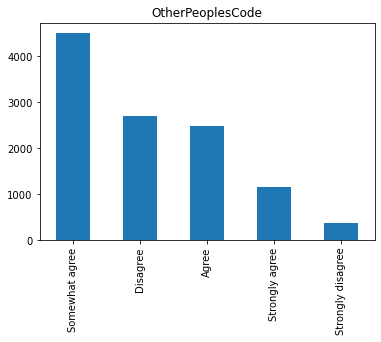

In [121]:
draw_bar(df, 'OtherPeoplesCode')

Most project management techniques are useless

Null values: 7980 of 19102


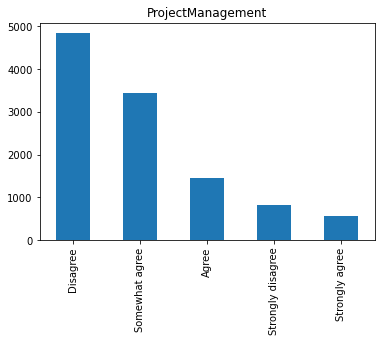

In [122]:
draw_bar(df, 'ProjectManagement')

I enjoy debugging code

Null values: 7844 of 19102


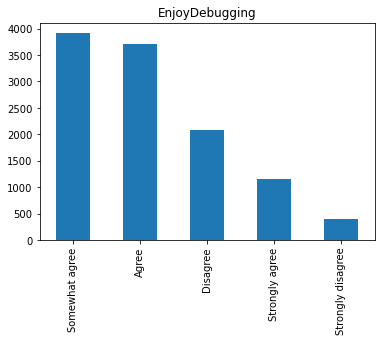

In [123]:
draw_bar(df, 'EnjoyDebugging')

I often get “into the zone” when I'm coding

Null values: 8001 of 19102


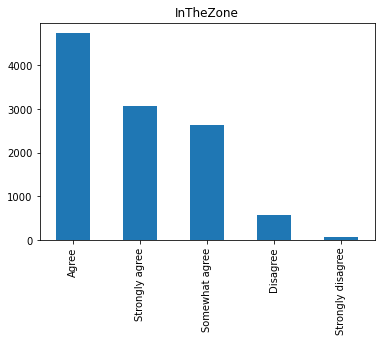

In [124]:
draw_bar(df, 'InTheZone')

I have difficulty communicating my ideas to my peers

Null values: 7892 of 19102


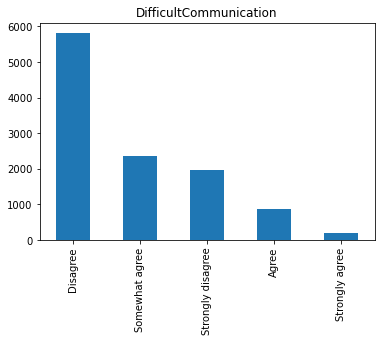

In [125]:
draw_bar(df, 'DifficultCommunication')

It's harder to collaborate with remote peers than those on site

Null values: 7972 of 19102


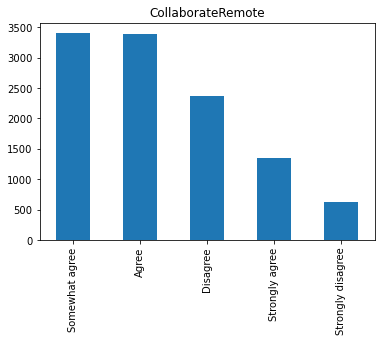

In [126]:
draw_bar(df, 'CollaborateRemote')

Congratulations! The bosses at your new employer, E Corp, are allowing you to choose which metrics will be used to assess your individual performance in your role as a senior developer. Which metrics do you suggest to the E bosses?

Null values: 9477 of 19102


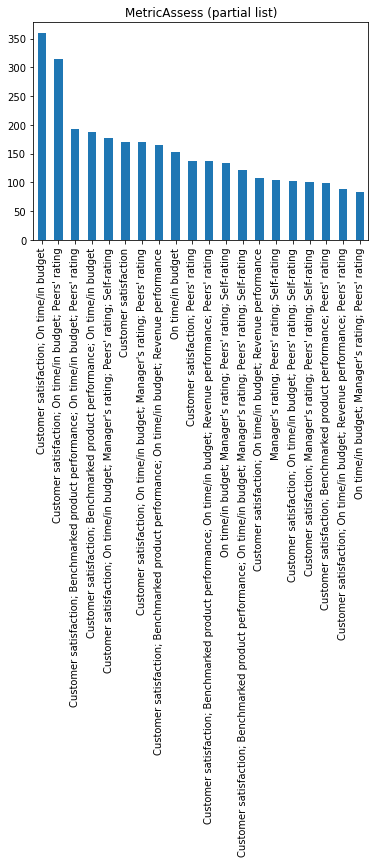

In [127]:
draw_bar(df, 'MetricAssess', 20)

Thinking about your main coding workstation, how satisfied are you with each of the following? Monitors/screens (number of, size, resolution)

Null values: 7972 of 19102


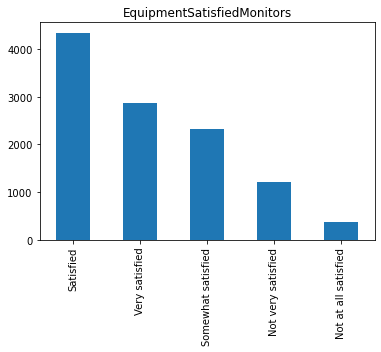

In [128]:
draw_bar(df, 'EquipmentSatisfiedMonitors')

Thinking about your main coding workstation, how satisfied are you with each of the following? Processing power (CPU and/or GPU)

Null values: 7975 of 19102


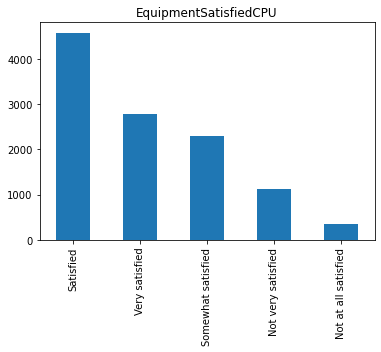

In [129]:
draw_bar(df, 'EquipmentSatisfiedCPU')

Thinking about your main coding workstation, how satisfied are you with each of the following? Amount of RAM

Null values: 7969 of 19102


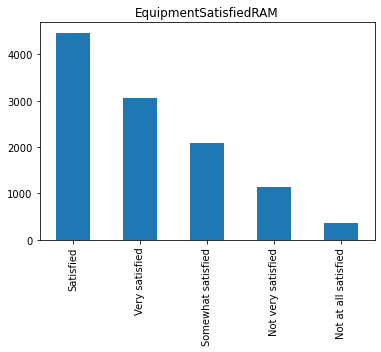

In [130]:
draw_bar(df, 'EquipmentSatisfiedRAM')

Thinking about your main coding workstation, how satisfied are you with each of the following? Storage capacity

Null values: 8002 of 19102


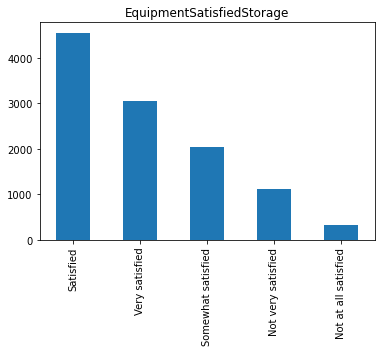

In [131]:
draw_bar(df, 'EquipmentSatisfiedStorage')

Thinking about your main coding workstation, how satisfied are you with each of the following? Storage read/write speed

Null values: 7992 of 19102


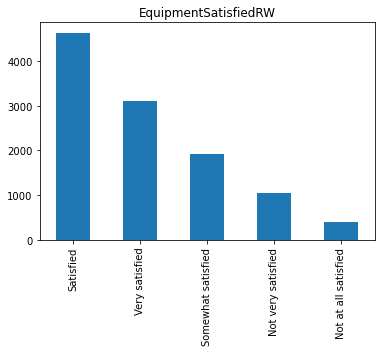

In [132]:
draw_bar(df, 'EquipmentSatisfiedRW')

How much influence do you have on purchasing decisions within your organization for each of the following? Internet bandwidth

Null values: 7996 of 19102


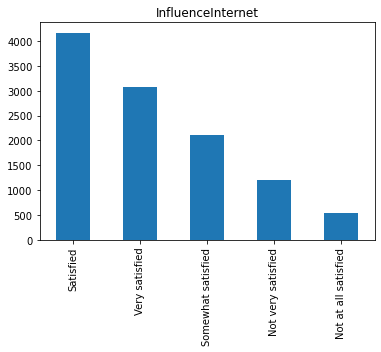

In [133]:
draw_bar(df, 'InfluenceInternet')

How much influence do you have on purchasing decisions within your organization for each of the following? Your personal workstation hardware

Null values: 10840 of 19102


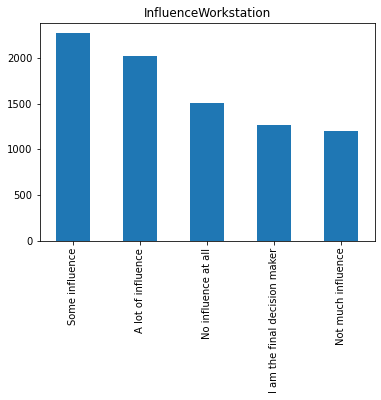

In [134]:
draw_bar(df, 'InfluenceWorkstation')

How much influence do you have on purchasing decisions within your organization for each of the following? Personal workstation hardware for others in the company

Null values: 10840 of 19102


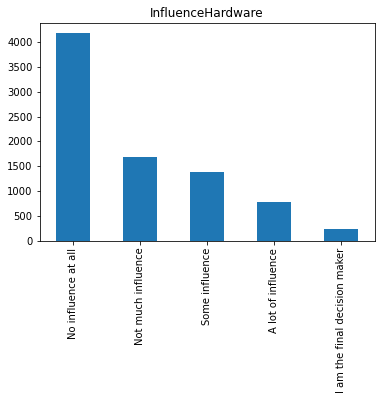

In [135]:
draw_bar(df, 'InfluenceHardware')

How much influence do you have on purchasing decisions within your organization for each of the following? Servers

Null values: 10863 of 19102


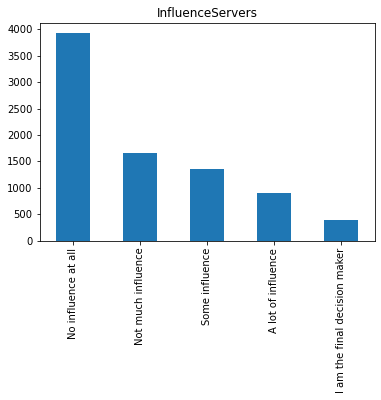

In [136]:
draw_bar(df, 'InfluenceServers')

How much influence do you have on purchasing decisions within your organization for each of the following? Main technical stack of the company

Null values: 10849 of 19102


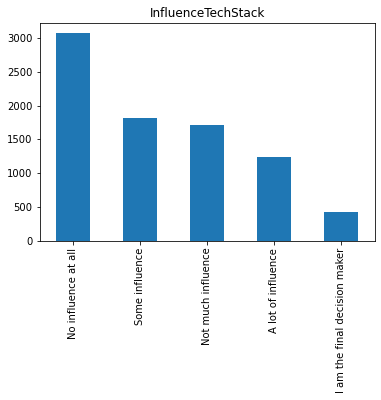

In [137]:
draw_bar(df, 'InfluenceTechStack')

How much influence do you have on purchasing decisions within your organization for each of the following? Technical stack used in your department

Null values: 10859 of 19102


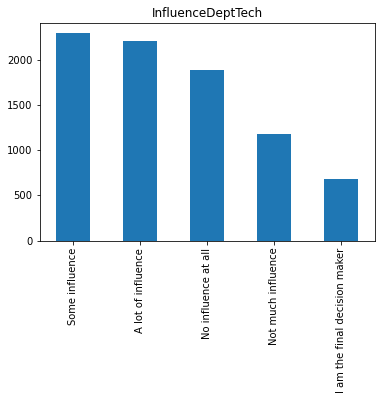

In [138]:
draw_bar(df, 'InfluenceDeptTech')

How much influence do you have on purchasing decisions within your organization for each of the following? Data analysis and visualization tools (e.g. Tableau, Looker)

Null values: 10858 of 19102


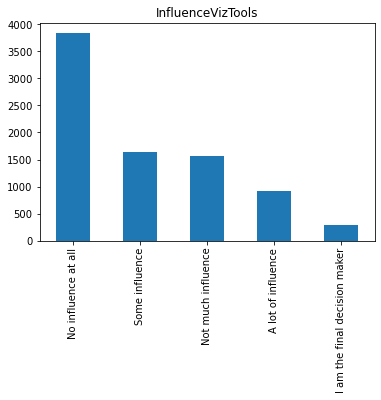

In [139]:
draw_bar(df, 'InfluenceVizTools')

How much influence do you have on purchasing decisions within your organization for each of the following? Database systems or solutions

Null values: 10847 of 19102


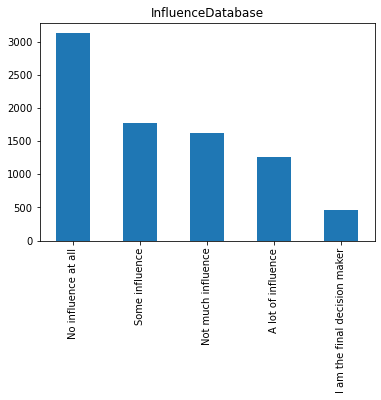

In [140]:
draw_bar(df, 'InfluenceDatabase')

How much influence do you have on purchasing decisions within your organization for each of the following? Cloud or serverless back-end solutions

Null values: 10859 of 19102


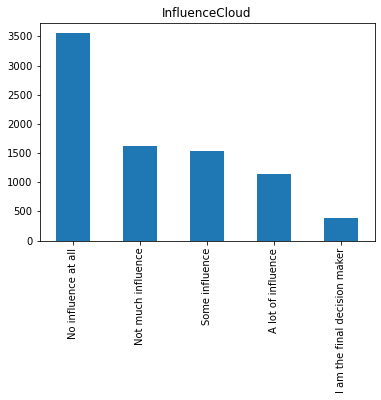

In [141]:
draw_bar(df, 'InfluenceCloud')

How much influence do you have on purchasing decisions within your organization for each of the following? Consultants

Null values: 10873 of 19102


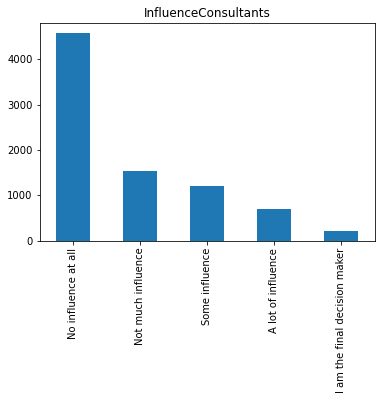

In [142]:
draw_bar(df, 'InfluenceConsultants')

How much influence do you have on purchasing decisions within your organization for each of the following? Recruitment tools & platforms

Null values: 10858 of 19102


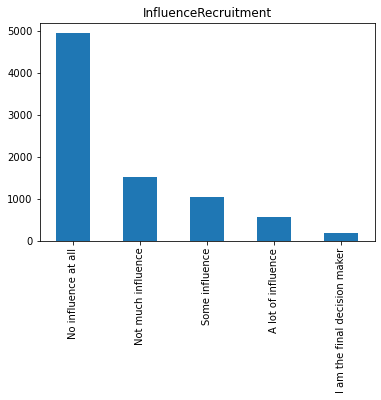

In [143]:
draw_bar(df, 'InfluenceRecruitment')

How much influence do you have on purchasing decisions within your organization for each of the following? Communication & collaboration tools

Null values: 10852 of 19102


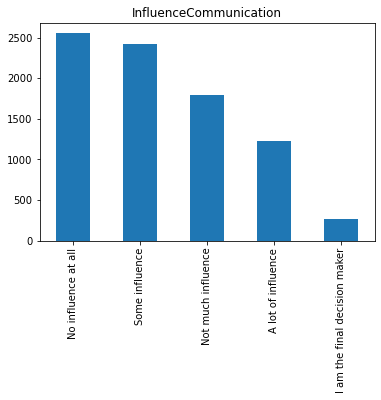

In [144]:
draw_bar(df, 'InfluenceCommunication')

Which of the following best describes you?

Null values: 5546 of 19102


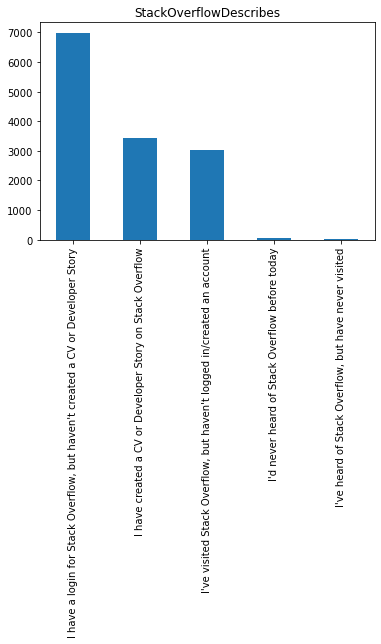

In [145]:
draw_bar(df, 'StackOverflowDescribes')

Which of the following devices have you used to connect to Stack Overflow over the last three months?

Null values: 6156 of 19102


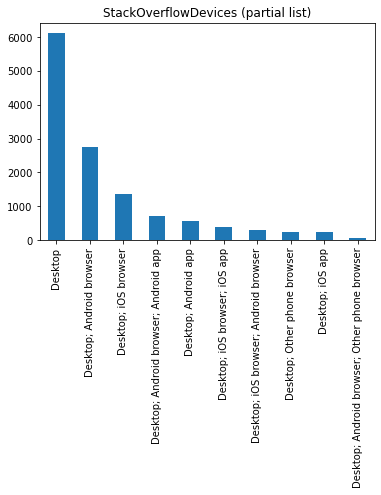

In [146]:
draw_bar(df, 'StackOverflowDevices', 10)

Over the last three months, approximately how often have you done each of the following on Stack Overflow? Found an answer that solved my coding problem

Null values: 6411 of 19102


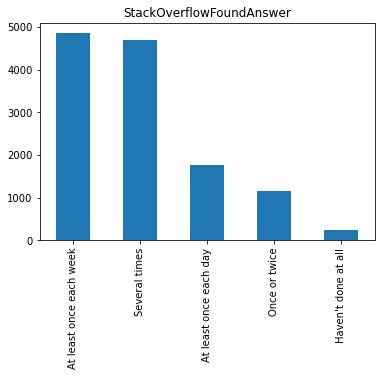

In [147]:
draw_bar(df, 'StackOverflowFoundAnswer')

Over the last three months, approximately how often have you done each of the following on Stack Overflow? Copied a code example and pasted it into my codebase

Null values: 6525 of 19102


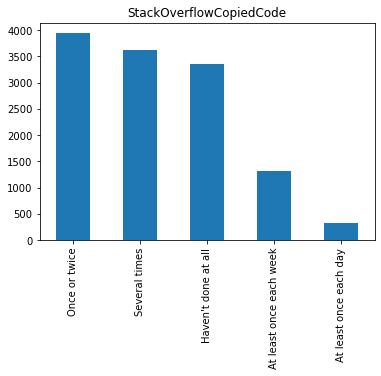

In [148]:
draw_bar(df, 'StackOverflowCopiedCode')

Over the last three months, approximately how often have you done each of the following on Stack Overflow? Seen a job listing I was interested in

Null values: 6677 of 19102


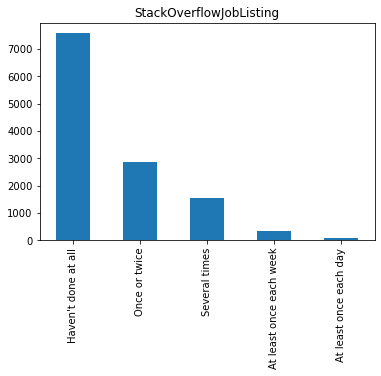

In [149]:
draw_bar(df, 'StackOverflowJobListing')

Over the last three months, approximately how often have you done each of the following on Stack Overflow? Researched a potential employer by visiting its company page

Null values: 6691 of 19102


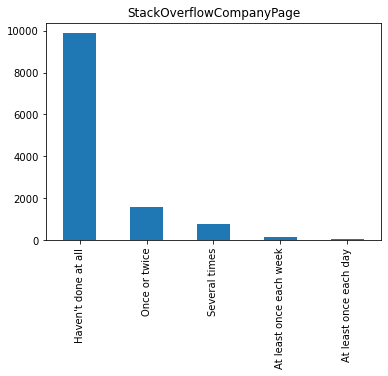

In [150]:
draw_bar(df, 'StackOverflowCompanyPage')

Over the last three months, approximately how often have you done each of the following on Stack Overflow? Searched for jobs

Null values: 6695 of 19102


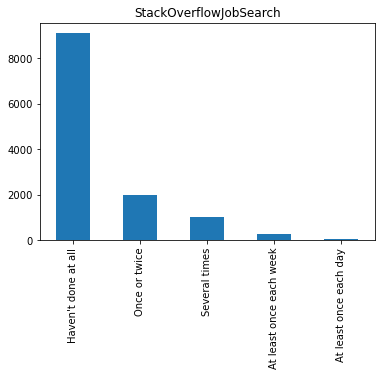

In [151]:
draw_bar(df, 'StackOverflowJobSearch')

Over the last three months, approximately how often have you done each of the following on Stack Overflow? Asked a new question

Null values: 6630 of 19102


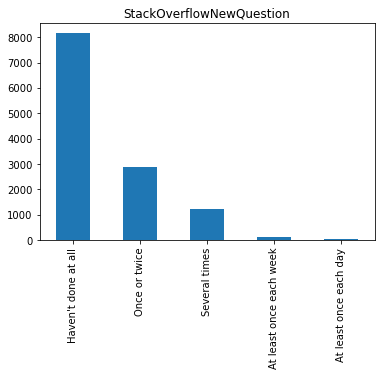

In [152]:
draw_bar(df, 'StackOverflowNewQuestion')

Over the last three months, approximately how often have you done each of the following on Stack Overflow? Written a new answer to someone else's question

Null values: 6657 of 19102


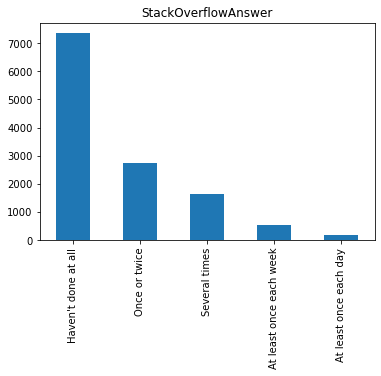

In [153]:
draw_bar(df, 'StackOverflowAnswer')

Over the last three months, approximately how often have you done each of the following on Stack Overflow? Participated in community discussions on meta or in chat

Null values: 6688 of 19102


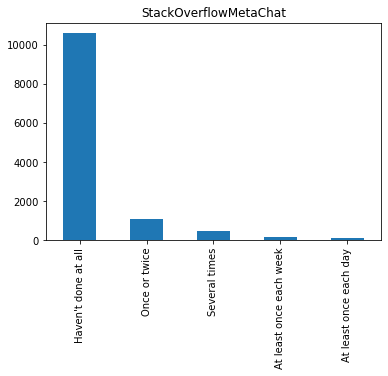

In [154]:
draw_bar(df, 'StackOverflowMetaChat')

The ads on Stack Overflow are relevant to me

Null values: 7575 of 19102


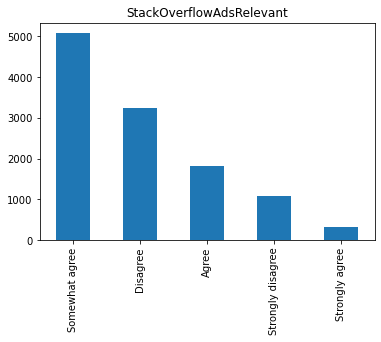

In [155]:
draw_bar(df, 'StackOverflowAdsRelevant')

The ads on Stack Overflow are distracting

Null values: 7261 of 19102


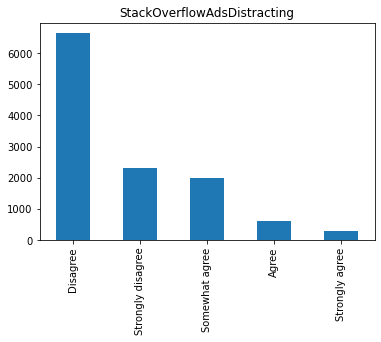

In [156]:
draw_bar(df, 'StackOverflowAdsDistracting')

The moderation on Stack Overflow is unfair

Null values: 7766 of 19102


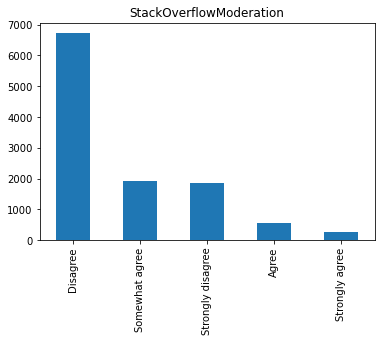

In [157]:
draw_bar(df, 'StackOverflowModeration')

I feel like a member of the Stack Overflow community

Null values: 7038 of 19102


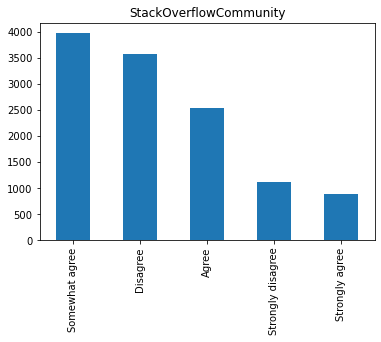

In [158]:
draw_bar(df, 'StackOverflowCommunity')

The answers and code examples I get on Stack Overflow are helpful

Null values: 6560 of 19102


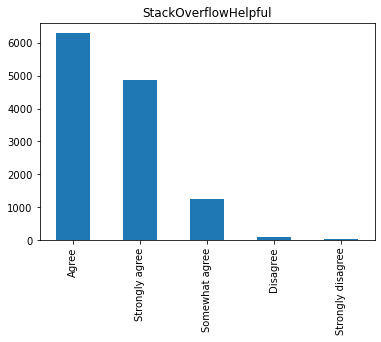

In [159]:
draw_bar(df, 'StackOverflowHelpful')

Stack Overflow makes the Internet a better place

Null values: 6640 of 19102


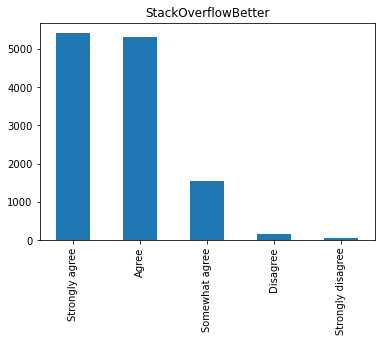

In [160]:
draw_bar(df, 'StackOverflowBetter')

I don't know what I'd do without Stack Overflow

Null values: 6717 of 19102


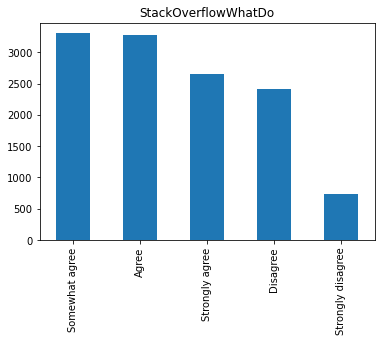

In [161]:
draw_bar(df, 'StackOverflowWhatDo')

Which of the following do you currently identify as?

Null values: 6192 of 19102


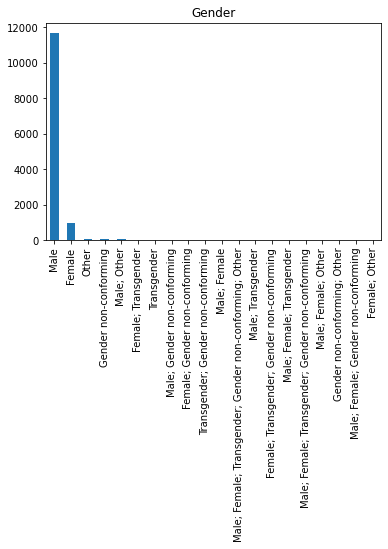

In [162]:
draw_bar(df, 'Gender')

What is the highest level of education received by either of your parents?

Null values: 6249 of 19102


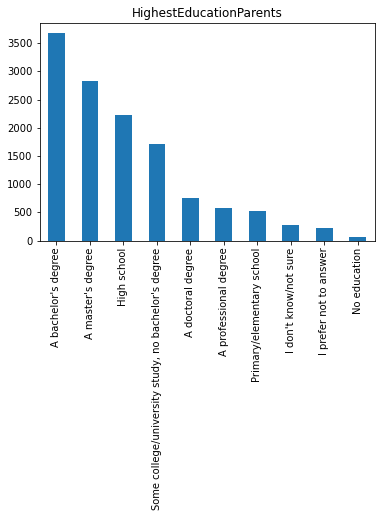

In [163]:
draw_bar(df, 'HighestEducationParents')

Which of the following do you identify as?

Null values: 6884 of 19102


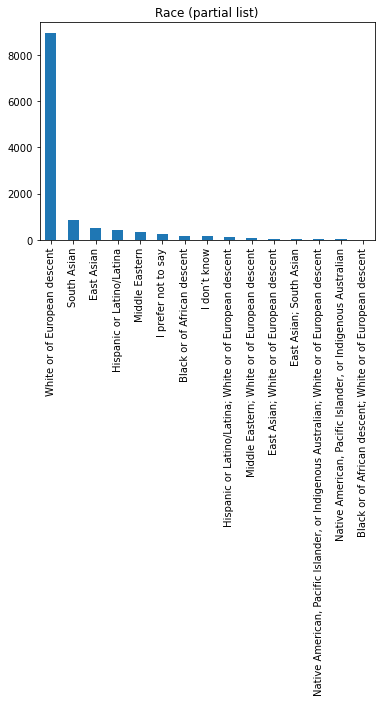

In [164]:
draw_bar(df, 'Race', 15)

This survey was too long

Null values: 6299 of 19102


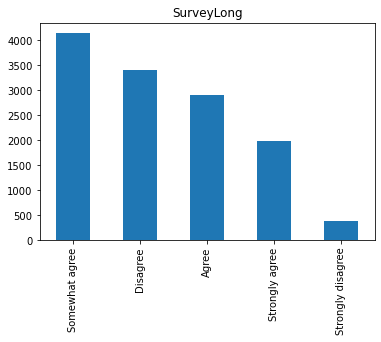

In [165]:
draw_bar(df, 'SurveyLong')

The questions were interesting

Null values: 6366 of 19102


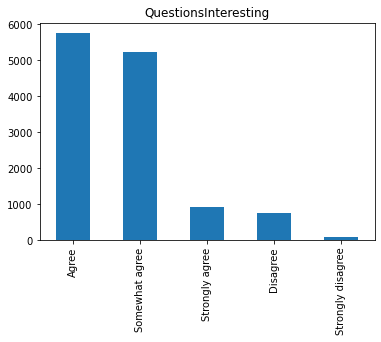

In [166]:
draw_bar(df, 'QuestionsInteresting')

The questions were confusing

Null values: 6396 of 19102


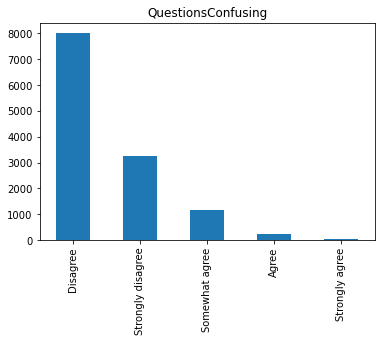

In [167]:
draw_bar(df, 'QuestionsConfusing')

I'm interested in learning how other developers answered

Null values: 6342 of 19102


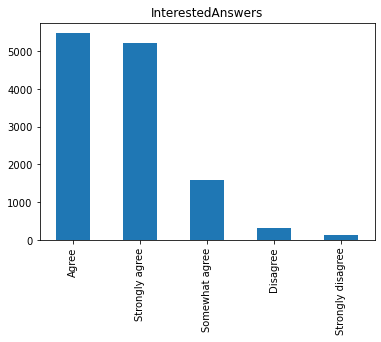

In [168]:
draw_bar(df, 'InterestedAnswers')

# Data Science Process Remining Steps 
We covered the following Data Science Process steps in this notebook:
- gather
- assess
- analyze

Remaining steps are covered in a separate notebook (Blog-Post-Business-Questions.jpynb).

# End of Notebook